# Table of Contents

1. [Prediction Prototype Algorithm](#PredictionPrototypeAlgorithm)
2. [Utility Functions](#UtilityFunctions) 
3. [Creating Data Frames for Already Processed DataSets](#CreatingDataFramesforAlreadyProcessedDataSets) 
4. [Covid_19_Countires_Wise Analysis](#Covid_19_Countires_Wise_Analysis)
    - 4.1 [Data Preprocessing](#DataPreprocessing)
    - 4.2 [Creating Time Series model](#CreatingTimeSeriesmodel)
    - 4.3 [Visualize Covid-19 Time Series Predictions](#VisualizeCovid19TimeSeriesPredictions)
    - 4.4 [Prediction Prototype Algorithm](#PredictionPrototypeAlgorithm)
    - 4.5 [Covid 19 Data Frame Generated by Time Series Model](#Covid19DataFrameGeneratedbyTimeSeriesModel)
    - 4.6 [Selecting the population of the countries under consideration](#Selectingthepopulationofthecountriesunderconsideration)
    - 4.7 [Normalising covid data with population  ](#Normalisingcoviddatawithpopulation )
    - 4.8 [Covid-19 Clusters Plot](#Covid19ClustersPlot)
    - 4.9 [Labeling Criterion for Covid Data ](#LabelingCriterionforCovidData)
    - 4.11[Covid19 Daily Data Analysis](#Covid19DailyDataAnalysis)
    - 4.12[Covid19 Daily Clusters Plot](#Covid19DailyClustersPlot)
5. [Population data based on classification of Age groups](#PopulationdatabasedonclassificationofAgegroups)
    - 5.1 [Age groups Classification Clusters Plot](#AgegroupsClassificationClustersPlot)
    - 5.2 [Cluste Labeling :- Age groups](#ClusteLabelingAgegroups)
6. [Co-morbidities Dataframe Clustering](#ComorbiditiesDataframeClustering)
    - 6.1 [HIVs](#HIV)
     - 6.1.1 [HIV Cluster Plot](#HHIVClusterPlot)
     - 6.1.2 [Cluste Labeling :- HIV Cases](#ClusteLabelingHIVCases)
    - 6.2 [Blood Pressure](#BloodPressure)
     - 6.2.1 [Blood Pressure Cluster Plot](#BloodPressureClusterPlot)
     - 6.2.2 [Cluste Labeling :- Blood Pressure Cases](#ClusteLabelingBloodPressureCases)
    - 6.3 [Diabetes](#Diabetes)
     - 6.3.1 [Diabetes Cluster Plot](#DiabetesPlot)
     - 6.3.2 [Cluste Labeling :- Diabetes Cases](#ClusteLabelingDiabetesCases)
    - 6.4 [Tuber Culosis](#TuberCulosis)
     - 6.4.1 [Tuber Culosis Cluster Plot](#TuberCulosisClusterPlot)
    - 6.5 [Medical Expending](#MedicalExpending)
     - 6.5.1 [Medical Expending Cluster Plot](#MedicalExpendingClusterPlot)
     - 6.5.2 [Cluste Labeling :- Medical Expending](#ClusteLabelingMedicalExpending)
7. [Listing all the Clusters of Comorbidites](#ListingalltheClustersofComorbidites)
8. [Main Cluster for Prediction](#MainClusterforPrediction)
    - 8.1 [Main Mega Frame Formation](#MainMegaFrameFormation)
    - 8.2 [Ensuring Clusters Uniformity](#EnsuringClustersUniformity)
    - 8.3 [Main Cluster Plot](#MainClusterPlot)
    - 8.4 [Cluste Labeling :- Main Cluster](#ClusteLabelingMainCluster)
9. [Preparing Data for Deep Net Model](#PreparingDataforDeepNetModel)
    - 9.1 [Deep Net Model](#DeepNetModel)
10. [Vaccine Dosage Prediction](#VaccineDosagePrediction)
    - 10.1 [Minimum Covid Vaccine Required Plot](#MinimumCovidVaccineRequiredPlot)
    - 10.2 [Minimum Percentage Vaccine Required Plot](#MinimumPercentageVaccineRequiredPlot)
    - 10.3 [Countries Covid Vulnerability Status Plot](#CountriesCovidVulnerabilityStatusPlot)
11. [Discussion](#discuss)
    

# Prediction Prototype Algorithm
<a class="anchor" id="PredictionPrototypeAlgorithm"></a>

In [1]:
## To Enable Verbos Mode set Verbose to True
Verbose = False
Debug = False
TimeSeriesEnable = True
No_of_days_To_Predict = 10
Analysis_window = 10    ## Enter no of Days to backpropogate  value < 30 
PATH = 'E:\Deep_Net_Model\model.pkl' ## To save deep net model after training
Train_model = True ## To Train deep net model keep it false if already have a trainded model saved

In [2]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
from mpl_toolkits.mplot3d import Axes3D
import math
import datetime as dt
import os
import sys

## ML Models import
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import linear_model
from sklearn.decomposition import PCA

## Deep net model Pytorch module import
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

## For Date time processing requirments
from datetime import datetime


In [3]:
## PCA Decomposition Configuration
pca = PCA(n_components=2)

## Utility Functions
<a class="anchor" id="UtilityFunctions"></a>

In [4]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    
## Function for Cluster Plotting 

def plot_cluster(data_frame,title,xlabel,ylabel):
    g1x = []
    g1y = []
    g2x = []
    g2y = []
    g3x = []
    g3y = []
    g4x = []
    g4y = []
    g5x = []
    g5y = []
    g6x = []
    g6y = []
    g7x = []
    g7y = []
    g8x = []
    g8y = []
    g9x = []
    g9y = []
    g10x = []
    g10y = []

    for i,j,k in data_frame:
        if(k == 0):
            g1x.append(i)
            g1y.append(j)
        elif(k==1):
            g2x.append(i)
            g2y.append(j)
        elif(k==2):
            g3x.append(i)
            g3y.append(j)
        elif(k==3):
            g4x.append(i)
            g4y.append(j)
        elif(k==4):
            g5x.append(i)
            g5y.append(j)
        elif(k==5):
            g6x.append(i)
            g6y.append(j)
        elif(k==6):
            g7x.append(i)
            g7y.append(j)
        elif(k==7):
            g8x.append(i)
            g8y.append(j)
        elif(k==8):
            g9x.append(i)
            g9y.append(j)
        elif(k==9):
            g10x.append(i)
            g10y.append(j)



    data = [(g1x,g1y), (g2x,g2y), (g3x,g3y), (g4x,g4y), (g5x,g5y), (g6x,g6y), (g7x,g7y), (g8x,g8y), (g9x,g9y), (g10x,g10y)]
    colors = ("red", "green", "blue","orange","purple","black","magenta","cyan","gold","cadetblue")
    groups = ("Cluster1", "Cluster2", "Cluster3","Cluster4","Cluster5","Cluster6","Cluster7","Cluster8","Cluster9","Cluster10")
    
    ## Testing the number of clusters to be ploted
    no_of_cluster = 0
    for i in data:
        if(len(i[0]) == 0):
            break
        no_of_cluster += 1
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, facecolor = "1.0")

    for data, color, group in zip(data, colors[:no_of_cluster], groups[:no_of_cluster]):
        print(data)
        t = data
        x , y = t
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=100, label=group)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    plt.legend(prop={"size":10}, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    
def plot_cluster_3d(data_frame,title,xlabel,ylabel,zlabel):
    
    a = []
    b = []
    c = []
    d = []
    
    for i in data_frame:
        a.append(i[0][0])
        b.append(i[1][0])
        c.append(i[2][0])
        d.append(i[3])
        
    data = pd.DataFrame()
    
    data['val1'] = a
    data['val2'] = b
    data['val3'] = c
    data['cluster'] = d
    
    colors = ["red", "green", "blue","yellow","purple","black","magenta","cyan"]
    groups = ["Sever1", "Sever2", "Sever3","Sever4","Sever5","Sever6","Sever7","Sever8"]
    
    for i in range(1,len(data)):
        print(data.iloc[i])
    
    
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    #ax = Axes3D(fig)
    
    print(data)
    
    x = np.array(data['val1'])
    y = np.array(data['val2'])
    z = np.array(data['val3'])
    
    ax.scatter(x,y,z, marker="s", c='red', edgecolors='none', s=100, label=groups) #,cmap="RdBu")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.title(title)
    plt.legend(loc=2,prop={"size":10})
    plt.show()
    
    

In [5]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler


class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, file_name):
        # store the inputs and outputs

        file_out = pd.read_csv(file_name)
        self.X = file_out.values
        self.Y = file_out.values

        # Scaling the features
        sc = StandardScaler()
        x_train = sc.fit_transform(self.X)
        y_train = self.Y

        self.x_train = torch.tensor(x_train , dtype=torch.float32)
        self.y_train = torch.tensor(y_train)

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.x_train[idx], self.y_train[idx]]

In [6]:
# Function to transform Dataframes from [Values] to Values

def transformDataframe(data):
    column_heading = list(data.columns)
    for i in range(len(column_heading)):
        if((str(type(data[column_heading[i]][0])) == "<class 'numpy.int32'>") or (str(type(data[column_heading[i]][0])) == "<class 'int'>")):
            column_heading.remove(column_heading[i])
    for k in column_heading:
        for i in data.index: 
            data[k][i] = float(data[k][i][0])
    return data

In [7]:
def auto_labeler(data,pos_neg_vector):
    
    clus_labels = ["Sever-1","Sever-2","Sever-3","Sever-4","Sever-5","Seve-6","Sever-7","Sever-8","Sever-9","Sever-10"]
    
    data = transformDataframe(data) ## Trasnforming data frame
    
    
    ## Calculating means for different cluster values
    clus_count = len(set(data['cluster']))
    Clus_vals = []
    Clus_final_score = []
    for i in range(clus_count):Clus_vals.append(list(data[data['cluster'] == i].mean()))
    print("Cluster Mean Values " + str(Clus_vals))
    
    
    print(len(Clus_vals[0]) - 1)
    
    for j in range(clus_count):
        temp_value = 0
        for i in range(len(Clus_vals[0]) - 1):                                # -1 is done so that we dont consider cluster column
            temp_value = temp_value + (float(pos_neg_vector[i]) * Clus_vals[j][i])
        Clus_final_score.append(temp_value)
    
    print("Final Cumlative Cluster Scores" + str(Clus_final_score))
    
    Decison_Clus = Clus_final_score.copy()
    
    Decison_Clus.sort(reverse=True)
    
    print("Final Cumlative Cluster Scores sorted " + str(Decison_Clus))
    
    result_lis = []
    
    for i in Decison_Clus:
        for j in range(len(Clus_final_score)):
            if(i == Clus_final_score[j]):
                result_lis.append(j)
                break
    
    print("Labeled Cluster:- " + str(result_lis))
    result = []
    for i in result_lis:
        result.append([i,clus_labels[i]])
        
    # Output Generator
    print("\033[1m" + "\nCluster Auto Labeling \n" + "\033[1m")
    for i in range(len(result_lis)):
        print("\033[1m" + "Cluster " + str(result_lis[i])  + " ------> " + "Susceptibility " +clus_labels[i] +" Cluster Magnitude =" + str(Decison_Clus[i]) + " " + "\033[1m")
        print("\n")
        
        
    return result,result_lis
                
                
    
    
        
        
    
        
    
    

In [8]:
# Auto Weight Generations 


def auto_weight_gen(clus_data):
    length = len(clus_data)
    final_weight_list = []
    weight_list = []
    for i in range(length):
        weight_list.append(i/(length-1))
#         final_weight_list.append(0)
    for i in range(len(clus_data)):
        final_weight_list.append(weight_list[clus_data.index(i)])
    print(final_weight_list)    
    return final_weight_list
        
#auto_weight_gen(labeled_clus_pop) 

def auto_cluster_label(clus_data):
    length = len(clus_data)
    final_weight_list = []
    weight_list = []
    for i in range(length):
        weight_list.append(i)
    for i in range(len(clus_data)):
        final_weight_list.append(weight_list[clus_data.index(i)])
    print(final_weight_list)    
    return final_weight_list

In [9]:
def Data_range_selector(date,no_of_days):
    if(no_of_days > 30):
        no_of_days = 30
        
    month_days = [31,28,31,30,31,30,31,30,31,30,31,30]
    date = Latest_date.split('-')
    val = 0
    if(int(date[2]) > int(no_of_days)):
        val = int(date[2]) - int(no_of_days)
        date[2] = str(val)
        return " ".join(date).replace(" ","-")
    
    
    else:
        if(int(date[1]) != int('01')):
            if((int(date[1]) - 1) < 10):
                date[1] = '0'+ str(int(date[1]) - 1 )
            else:
                date[1] = str(int(date[1]) - 1 )
                
            val = 0 
            val = int(no_of_days) - int(date[2]) 
            date[2] = str(month_days[int(date[1]) - 1] - val)
            
            return " ".join(date).replace(" ","-")
        else:
            date[1] = str(12)
            val = 0 
            val = int(no_of_days) - int(date[2]) 
            date[2] = str(month_days[12 - 1] - val)
            
            date[0] = str(int(date[0]) - 1 )
            
            return " ".join(date).replace(" ","-")
            
            

In [10]:
def transformDataframeto_float(data):
    column_heading = list(data.columns)
    for k in column_heading:
        for i in data.index: 
            data[k][i] = float(data[k][i])
    return data

In [11]:
# Function to optimize the cluster no based on data
def Clust_no_optimizer(selected_countries,Verbose = False): 
    count = 1
    prev_val_incr = 0
    prev_val_decr = 0
    while(True):
        clustering = KMeans(n_clusters=count, random_state=0,max_iter = 300,).fit(selected_countries)
        ## Calculating Within Cluster Sum and Minimizing it to decide optimal no of Clusters
        centers = clustering.cluster_centers_
        clus = clustering.labels_
        data = []
        data_val = [0 for x in range(count)]
        
        
        for i in range(len(clustering.labels_)):
            data.append([float(selected_countries[i,[0]]),float(selected_countries[i,[1]]),float(selected_countries[i,[2]])])
        for i in range(len(clustering.labels_)):
            data_val[clustering.labels_[i]] = data_val[clustering.labels_[i]] + (( centers[clustering.labels_[i]][0] - data[i][0])**2 
                                                                            + ( centers[clustering.labels_[i]][1] - data[i][1])**2 

                                                                                 + ( centers[clustering.labels_[i]][2] - data[i][2])**2 )  
        if Verbose:
            print(clustering.cluster_centers_)
            print(clustering.labels_)
            print(data_val)                 
            print(sum(data_val))

        ## Calculating Outer Cluster Sum and Maximizing it to decide optimal no of Clusters.
        data_val_outer = [0 for x in range(count)]
        for i in range(len(clustering.labels_)):
            for k in range(len(centers)):
                if(k==i):
                    continue
                else:
                    data_val_outer[clustering.labels_[i]] = data_val_outer[clustering.labels_[i]] + (( centers[clustering.labels_[k]][0] - data[i][0])**2 
                                                                                    + ( centers[clustering.labels_[k]][1] - data[i][1])**2 
                                                                                         + ( centers[clustering.labels_[k]][2] - data[i][2])**2 )

        if Verbose:
            print(data_val_outer)                 
            print(sum(data_val_outer))

        
        if(((prev_val_incr - sum(data_val)) < 0.05 or (sum(data_val_outer) - prev_val_decr) < 0.1) and count > 2):
            print("\033[1m"+"System Generated cluster no = " + str(count) + "\033[1m")
            return count
            break
        elif(count == 10):
            print("\033[1m"+"System Generated cluster no = " + str(count)+ " CLuster Limit Capped !" + "\033[1m")
            return count
            break
        else:
            if Verbose:
                print('*************************************')
                print(prev_val_incr - sum(data_val) < 0.05)
                print(prev_val_incr - sum(data_val))
                print((sum(data_val_outer) - prev_val_decr) < 0.1)
                print(sum(data_val_outer) - prev_val_decr)
                print('*************************************')
            prev_val_incr = sum(data_val)
            prev_val_decr = sum(data_val_outer)
            count = count + 1
            
        
        

# Creating Data Frames for Already Processed DataSets
<a class="anchor" id="CreatingDataFramesforAlreadyProcessedDataSets"></a>

In [12]:
Covid_19_Countires_Wise = pd.read_csv('../../Covid-19-Data(selected-dataset)/countries-aggregated.csv')
Blood_Pressure_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Blood_Pressure_Countires_Wise_Processed.csv')
Diabetes_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Diabetes_Countires_Wise_Processed.csv')
HIV_Countires_Wise = pd.read_csv('../Pre_Processed_Data/HIV_Countires_Wise_Processed.csv')
Medical_Expending_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Medical_Expending_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise_Descreet = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Descreet_Processed.csv')
Tuber_Culosis_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Tuber_Culosis_Countires_Wise_Processed.csv')
Population_Data_Age_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Age_Wise.csv')
## Removing extra Unnamed:0 columns created during file storage 

Blood_Pressure_Countires_Wise = Blood_Pressure_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Diabetes_Countires_Wise = Diabetes_Countires_Wise.drop(['Unnamed: 0'],axis=1)
HIV_Countires_Wise = HIV_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Medical_Expending_Countires_Wise = Medical_Expending_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise = Population_Data_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Tuber_Culosis_Countires_Wise = Tuber_Culosis_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise_Descreet = Population_Data_Countires_Wise_Descreet.drop(['Unnamed: 0'],axis=1)
Population_Data_Age_Wise = Population_Data_Age_Wise.drop(['Unnamed: 0'],axis=1)


## 1. Covid_19_Countires_Wise Analysis
<a class="anchor" id="Covid_19_Countires_Wise_Analysis"></a>

## Data Preprocessing
<a class="anchor" id="DataPreprocessing"></a>

In [13]:
#Covid_19_Countires_Wise = Covid_19_Countires_Wise.drop([length-1])
Covid_19_Countires_Wise.fillna(0)
# if Verbose:
#     Covid_19_Countires_Wise

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
85819,2021-04-08,Zimbabwe,37052,34814,1532
85820,2021-04-09,Zimbabwe,37147,34831,1535
85821,2021-04-10,Zimbabwe,37273,34862,1538
85822,2021-04-11,Zimbabwe,37288,34873,1538


In [14]:
data = np.array(Covid_19_Countires_Wise)
date_range = data[:,0]
Country_name = data[:,1]
time_series_data = data[:,[2,3,4]]

if Verbose:
    print(time_series_data)

Xs = time_series_data

n = len(set(list(data[:,0])))
if Verbose:
    print(n)

## Creating Time Series model
<a class="anchor" id="CreatingTimeSeriesmodel"></a>

In [15]:
## No of days data collected so far
n = len(set(list(data[:,0])))

def time_series_forecaste(data,pred):
    fix_latest_data = np.amax(data,axis=0)[0]
    w1 = []
    fix_latest_data = np.datetime64(fix_latest_data) + np.timedelta64(1,'D')
    predict_frame = np.zeros(shape=(1,5)) 
    filter1 = []
    #latest_data = type(dt.datetime(latest_data))
    countries = set(list(data[:,1]))
    p = 0
    x = 0 
    for i in countries:
        latest_data = fix_latest_data
        filter1.clear()
        p = p + 1
        completed = (p/len(countries))*100
        if(p == n/4 or p == n/2 or p == (n*3)/4 or p == n):
            print(f'% completed = {completed}', flush=True)
        count = pred
        
        for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
        data2 = data[filter1]
        w1.clear()
        for j in range(0,len(data2[:,0])):
            if(data2[j,1] == i):
                x = x + 1
                
                for k in range(len(data2[:,[2]])):
                    w1.append((len(data2[:,[2]])- k)/len(data2[:,[2]]))
                
                count = count - 1
                val1 = ((sum(data2[:,2]*w1))/len(data2[:,[2]]))
                val2 = ((sum(data2[:,3]*w1))/len(data2[:,[3]]))
                val3 = ((sum(data2[:,4]*w1))/len(data2[:,[4]]))
                predict_frame = np.append(predict_frame,[str(latest_data),str(i),str(int(val1)),str(int(val2)),str(int(val3))])
                predict_frame = predict_frame.reshape((int(len(predict_frame)/5)),5)
                latest_data = np.datetime64(latest_data) + np.timedelta64(1,'D')
                data2 = np.append(data2,[str(latest_data),str(i),int(val1),int(val2),int(val3)])
                data2 = data2.reshape((int(len(data2)/5)),5)
                data2[:,[2,3,4]] = data2[:,[2,3,4]].astype(np.int)
                w1.clear()
                if(count < 0):
                    break
    new_val = pd.DataFrame(predict_frame[1:,[0,1,2,3,4]])
    new_val = new_val.rename(columns = {0:'Date',1:'Country',2:'Confirmed',3:'Recovered',4:'Deaths'}, inplace = False)
    print('  completed Succesfully ', flush=True)
    return new_val
                
No_of_days_to_predict_in_future = No_of_days_To_Predict         
val123 = time_series_forecaste(data,No_of_days_to_predict_in_future) 
Future_covid_predictions = val123
if Verbose:
    val123  



  completed Succesfully 


In [16]:
val = np.array(val123)
val[:,[2]].astype(np.int)
w1 = []
for i in range(len(val[:,[2]])):
    w1.append((len(val[:,[2]])-i)/len(val[:,[2]]))
    
if Debug:
    print(val[:,[2]].astype(np.int))    
    print(val[:,[2]].astype(np.int)*w1)
    val[:,[2]].astype(np.int)*(val[:,[2]].astype(np.int)/63794)

In [17]:
Complete_Data = val123
filter1 = val123['Country'] == 'US'
val123 = val123[filter1]
if Verbose:
    val123 

## Visualize Covid-19 Time Series Predictions
<a class="anchor" id="VisualizeCovid19TimeSeriesPredictions"></a>

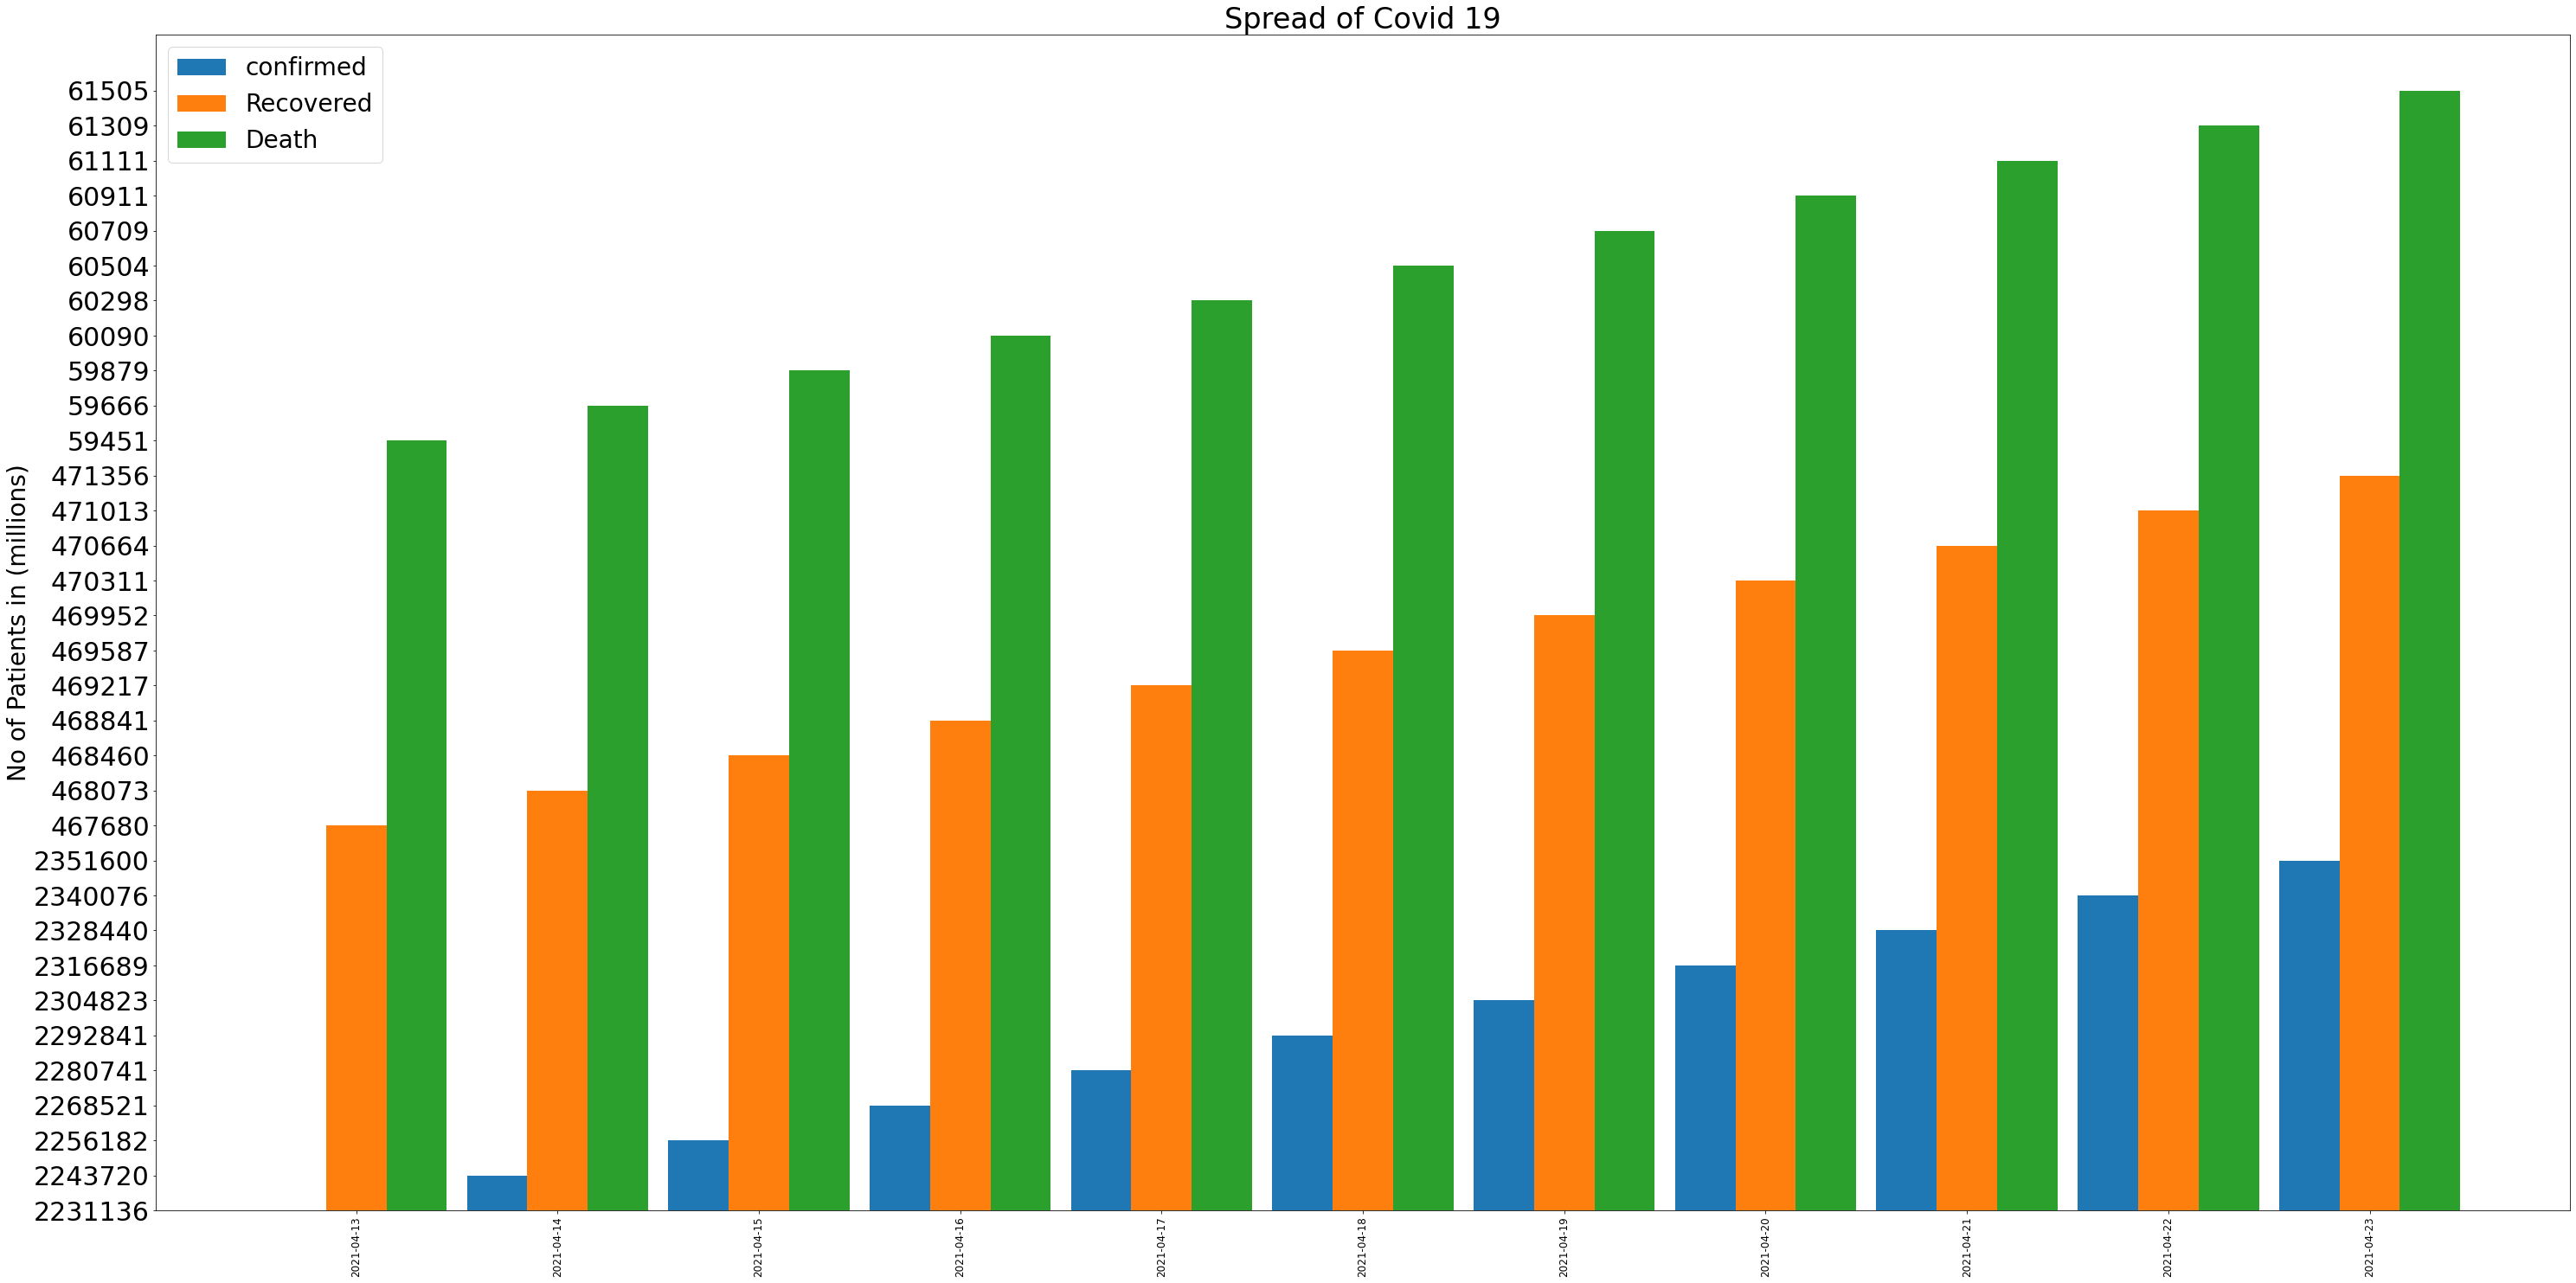

In [18]:
if Debug:
    print(Covid_19_Countires_Wise)
Visualize(val123, 
          ['US'],'Spread of Covid 19','No of Patients in (millions)',vx=50,vy=25,w=.3)

## Prediction Prototype Algorithm
<a class="anchor" id="PredictionPrototypeAlgorithm"></a>

In [19]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US','Bangladesh', 'Brazil',
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland','Ireland','Argentina',
'Australia', 'Canada', 'China','Slovenia','North Macedonia','Zimbabwe','Sweden','Netherlands','Pakistan']


## Covid 19 Data Frame Generated by Time Series Model
<a class="anchor" id="Covid19DataFrameGeneratedbyTimeSeriesModel"></a>

In [20]:
Complete_data_Time_series_model = Complete_Data

if Verbose:
    Complete_data_Time_series_model

## Covid-19 Data Frame 
<a class="anchor" id="Covid19DataFrame"></a>

In [21]:
## Extracting the latest avaialbele data in the Data Frame
length = len(Covid_19_Countires_Wise['Date'])
Latest_date = Covid_19_Countires_Wise['Date'][length-1]

if Verbose:
    print("Size of data is = " +  str(length))
    print("The Latest Date for the Data is = " + Latest_date)

In [22]:
## Loading the Latest data for the clustering

if(TimeSeriesEnable):
    length = len(Complete_data_Time_series_model['Date'])
    Latest_date = Complete_data_Time_series_model['Date'][length-1]
    Complete_Data_for_daily_Analysis = Complete_Data 
    Complete_Data = Complete_data_Time_series_model[Complete_data_Time_series_model['Date'] == Latest_date]
    Complete_Data.fillna(0)
    
else:
    Complete_Data_for_daily_Analysis = Covid_19_Countires_Wise
    Complete_Data = Covid_19_Countires_Wise[Covid_19_Countires_Wise['Date'] == Latest_date]
    Complete_Data.fillna(0)

if Verbose:
    Complete_Data

In [23]:
# Covid Data 
Complete_Data = np.array(Complete_Data)
Complete_Data[:,[2,3,4]] = np.array(Complete_Data[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data = Complete_Data[:,[0,1,2,3,4]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data = data[filter1]
    for j in range(0,len(Complete_Data[:,0])):
                if(Complete_Data[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data[:,[2]])):
                        w1.append((len(Complete_Data[:,[2]])- k)/len(Complete_Data[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data[:,2]))/len(Complete_Data[:,[2]]))
                    val2 = ((sum(Complete_Data[:,3]))/len(Complete_Data[:,[3]]))
                    val3 = ((sum(Complete_Data[:,4]))/len(Complete_Data[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries[:,[0,1,2,3]])



In [24]:
 if Debug:
    print(selected_countries[:,[0,1,2,3]])

# Selecting the population of the countries under consideration  
<a class="anchor" id="Selectingthepopulationofthecountriesunderconsideration"></a>

In [25]:
if Verbose:
    Population_Data_Countires_Wise_Descreet

In [26]:
# Covid countries population Data 
Complete_Data_pop = Population_Data_Countires_Wise_Descreet
Complete_Data_pop = np.array(Complete_Data_pop)
Complete_Data_pop[:,[8,9]] = np.array(Complete_Data_pop[:,[8,9]]).astype(int)
selected_countries_pop = np.zeros(shape=(1,3)) 
data = Complete_Data_pop[:,[0,1,2,3,4,5,6,7,8,9]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data_pop = data[filter1]
    for j in range(0,len(Complete_Data_pop[:,0])):
                if(Complete_Data_pop[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data_pop[:,[2]])):
                        w1.append((len(Complete_Data_pop[:,[2]])- k)/len(Complete_Data_pop[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data_pop[:,8]))/len(Complete_Data_pop[:,[8]]))
                    val2 = ((sum(Complete_Data_pop[:,9]))/len(Complete_Data_pop[:,[9]]))
                    selected_countries_pop = np.append(selected_countries_pop,[str(i),int(val1),int(val2)])
                    selected_countries_pop = selected_countries_pop.reshape((int(len(selected_countries_pop)/3)),3)
                    break;
selected_countries_pop   = selected_countries_pop[1:,[0,1,2]]


if Verbose:
    print(selected_countries_pop[:,[0,1,2]])

In [27]:
s_c_pop_df = pd.DataFrame(selected_countries_pop)
s_c_df = pd.DataFrame(selected_countries)
int(s_c_pop_df[s_c_pop_df[0] == 'Afghanistan'][1])
s_c_df_not_norm = s_c_df
if True:
    s_c_df

## Normalising covid data with population 
<a class="anchor" id="Normalisingcoviddatawithpopulation"></a>

In [28]:
for i in range(len(s_c_df)):
    s_c_df[1][i] = (int(s_c_df[1][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[2][i] = (int(s_c_df[2][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[3][i] = (int(s_c_df[3][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    

In [29]:
s_c_df = np.array(s_c_df)
selected_countries = s_c_df
if Debug:
    print(selected_countries)

In [30]:
# def Clust_no_optimizer(selected_countries): 
#     count = 1
#     prev_val_incr = 0
#     prev_val_decr = 0
#     while(True):
#         clustering = KMeans(n_clusters=count, random_state=0,max_iter = 300,).fit(selected_countries)
#         ## Calculating Within Cluster Sum and Minimizing it to decide optimal no of Clusters
#         print(clustering.cluster_centers_)
#         print(clustering.labels_)
#         centers = clustering.cluster_centers_
#         clus = clustering.labels_
#         data = []
#         #data_val = [0,0,0,0,0,0,0,0,0,0,0]
#         data_val = [0 for x in range(count)]
#         print(data_val)
#         for i in range(len(clustering.labels_)):
#             data.append([float(selected_countries[i,[0]]),float(selected_countries[i,[1]]),float(selected_countries[i,[2]])])
#         for i in range(len(clustering.labels_)):
#             data_val[clustering.labels_[i]] = data_val[clustering.labels_[i]] + (( centers[clustering.labels_[i]][0] - data[i][0])**2 
#                                                                             + ( centers[clustering.labels_[i]][1] - data[i][1])**2 

#                                                                                  + ( centers[clustering.labels_[i]][2] - data[i][2])**2 )  

#         print(data_val)                 
#         print(sum(data_val))

#         #37569633242.51316 3
#         #0.19750175162070788  4
#         #0.11979082937113043  5
#         #0.059624069628695056 6
#         #0.040419720887835194 7
#         #0.03133729001053416  8
#         #0.022515037021765022 9
#         #0.01340084357908471  10
#         #0.008307936065069188 11

#         ## Calculating Outer Cluster Sum and Maximizing it to decide optimal no of Clusters.
#         data_val_outer = [0 for x in range(count)]
#         for i in range(len(clustering.labels_)):
#             for k in range(len(centers)):
#                 if(k==i):
#                     continue
#                 else:
#                     data_val_outer[clustering.labels_[i]] = data_val_outer[clustering.labels_[i]] + (( centers[clustering.labels_[k]][0] - data[i][0])**2 
#                                                                                     + ( centers[clustering.labels_[k]][1] - data[i][1])**2 
#                                                                                          + ( centers[clustering.labels_[k]][2] - data[i][2])**2 )


#         print(data_val_outer)                 
#         print(sum(data_val_outer))

#         #18187959524588.74   3
#         #16.367611285435363  4
#         #18.79788704742568   5
#         #25.761786148483992  6
#         #28.04420937755073   7
#         #35.26581162118767   8
#         #37.91956258954619   9
#         #41.90662039645702  10
#         #49.85823552381891  11
        
#         if(((prev_val_incr - sum(data_val)) < 0.05 or (sum(data_val_outer) - prev_val_decr) < 0.1) and count > 2):
#             return count
#             break
#         else:
#             print('*************************************')
#             print(prev_val_incr - sum(data_val) < 0.05)
#             print(prev_val_incr - sum(data_val))
#             print((sum(data_val_outer) - prev_val_decr) < 0.1)
#             print(sum(data_val_outer) - prev_val_decr)
#             print('*************************************')
#             prev_val_incr = sum(data_val)
#             prev_val_decr = sum(data_val_outer)
#             count = count + 1
            
        
        



In [31]:
#clustering = DBSCAN(eps=300, min_samples=4).fit(selected_countries[:,[1,2,3]])
count = Clust_no_optimizer(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=count, random_state=0).fit(selected_countries[:,[1,2,3]])  # Converted no of Clusters from 5 -->3
clustering.labels_
clus = list(clustering.labels_)
print(clus)
covid_frame = list(zip(countries,clus))
covid_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
covid_frame1_data = covid_frame1
if Debug:
    print(covid_frame)
    print(covid_frame1)

System Generated cluster no = 7
[0, 3, 4, 6, 3, 5, 0, 4, 2, 0, 4, 6, 0, 1, 3, 1, 0, 6, 0, 1, 1, 0, 2, 2, 0]


In [32]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
covid_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    print(covid_frame1)

# Covid-19 Clusters Plot
<a class="anchor" id="Covid19ClustersPlot"></a>

([[-0.28302182193585473], [-0.25453046745836083], [-0.2930039427440567], [-0.29833783079826], [-0.2856626981807574], [-0.31155712243982825], [-0.2974441141186755], [-0.2667681500957554]], [[-0.02789093610513824], [-0.02914193565862534], [-0.029745597825815], [-0.03002742181656454], [-0.02873299339325594], [-0.028305381932834814], [-0.02889257956406732], [-0.0321717473958286]])
([[0.2462829200183688], [0.20131472249602197], [0.24211494244033405], [0.14420054679782332]], [[-0.020072394201811797], [-0.07059964741268529], [-0.06141519039134596], [-0.039347474983801284]])
([[0.007333484131369759], [0.04965081286957598], [0.03810084745917537]], [[0.1951822073037221], [0.22597693727408202], [0.21107832862183648]])
([[0.11076027951749916], [0.026539195294975153], [0.03495353341811233]], [[-0.014452266377400543], [-0.058954548062347], [0.04159990291045762]])
([[0.4645295193583133], [0.3591687316148002], [0.47974176534007296]], [[-0.12083386081800336], [-0.08969825978716527], [-0.130364028407776

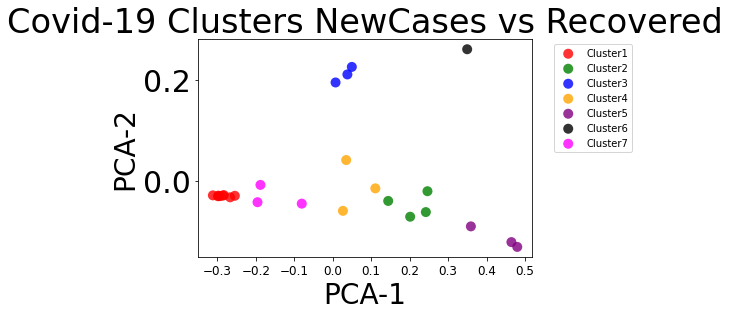

In [33]:
# Visulaize  Clusters 

title = 'Covid-19 Clusters NewCases vs Recovered'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = "cases_detected"
plot_cluster(covid_frame1,title,xlabel,ylabel)

In [34]:
# Auto Labeling of CLusters
if(Debug):
    print(selected_countries_pop[:,[0,1,2]])

## Labeling Criterion for Covid Data
<a class="anchor" id="LabelingCriterionforCovidData"></a>
* Cluster 0 ------> Severity 0 Lowest  
* Cluster 1 ------> Severity 5 Extream 
* Cluster 2 ------> Severity 1 Lower   
* Cluster 3 ------> Severity 4 Highest 
* Cluster 4 ------> Severity 3 High 
* Cluster 5 ------> Severity 2 Medium 

In [35]:
data_covid = pd.DataFrame(np.array(covid_frame1_data),columns=['Total_cases','Recovered','Deaths','cluster'])
_,labeled_clus_covid = auto_labeler(data_covid,[-1,1,-1])

Cluster Mean Values [[0.022913264430047004, 0.01767958295742796, 0.0004730256212537777, 0.0], [0.418370338865945, 0.31541424420021075, 0.010856844493175921, 1.0], [0.4206644842453646, 0.0022615780739023775, 0.018704064331969018, 2.0], [0.3154472670423953, 0.19867538530649717, 0.01432816747742916, 3.0], [0.5664029393613196, 0.498420391864909, 0.011381547110213408, 4.0], [0.710448879462964, 0.1424027649379762, 0.018581458722303792, 5.0], [0.12977887598114657, 0.09453096571875301, 0.0038910544871916994, 6.0]]
3
Final Cumlative Cluster Scores[-0.005706707093872823, -0.11381293915891016, -0.4371069705034313, -0.13110004921332727, -0.079364094606624, -0.5866275732472915, -0.03913896474958526]
Final Cumlative Cluster Scores sorted [-0.005706707093872823, -0.03913896474958526, -0.079364094606624, -0.11381293915891016, -0.13110004921332727, -0.4371069705034313, -0.5866275732472915]
Labeled Cluster:- [0, 6, 4, 1, 3, 2, 5]

Cluster Auto Labeling 

Cluster 0 ------> Susceptibility Sever-1 Cluster 

<ipython-input-35-ad21a0d087ec>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_covid = pd.DataFrame(np.array(covid_frame1_data),columns=['Total_cases','Recovered','Deaths','cluster'])


In [36]:
if Verbose:
    print(list(zip(selected_countries[:,[0]].tolist(),clus)))

In [37]:
if Debug:
    print(s_c_df_not_norm)

## Covid19 Daily Data Analysis 
<a class="anchor" id="Covid19DailyDataAnalysis"></a>

In [38]:

## Checking for TimeSeriesEnable Flag

if(TimeSeriesEnable):
    Analysis_window = Analysis_window + No_of_days_To_Predict
    
    new_df =  Covid_19_Countires_Wise.append(Complete_Data_for_daily_Analysis)
    if Debug:
        print(new_df)
        print(Complete_Data_for_daily_Analysis)
        print(Covid_19_Countires_Wise)

if Verbose:
    print(Complete_Data_for_daily_Analysis)

In [39]:
if Debug:
    print(new_df)

In [40]:
new_df['Date'] = pd.to_datetime(new_df['Date'],format='%Y-%m-%d')

In [41]:
## Generating new data frame for the specified range 

lowerbound_date =  Data_range_selector(Latest_date,Analysis_window)


lowerbound_date = datetime.strptime(lowerbound_date.replace('-','/'), '%Y/%m/%d')

if TimeSeriesEnable:
    data_dpecific_rangelower = new_df[new_df['Date'] >= lowerbound_date]
else:
    data_dpecific_rangelower = Complete_Data_for_daily_Analysis[Complete_Data_for_daily_Analysis['Date'] >= lowerbound_date]


if(Debug):
    print(data_dpecific_rangelower)

In [42]:
if Debug:
    print(lowerbound_date)
    print(data_dpecific_rangelower)

In [43]:
Complete_Data = np.array(data_dpecific_rangelower)
Complete_Data[:,[2,3,4]] = np.array(Complete_Data[:,[2,3,4]]).astype(int)

selected_countries = np.zeros(shape=(1,4)) 
data = Complete_Data[:,[0,1,2,3,4]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data = data[filter1]
    for j in range(0,len(Complete_Data[:,0])):
                if(Complete_Data[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data[:,[2]])):
                        w1.append((len(Complete_Data[:,[2]])- k)/len(Complete_Data[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data[:,2]))/len(Complete_Data[:,[2]]))
                    val2 = ((sum(Complete_Data[:,3]))/len(Complete_Data[:,[3]]))
                    val3 = ((sum(Complete_Data[:,4]))/len(Complete_Data[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
date_dpecific_average   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(date_dpecific_average[:,[0,1,2,3]])

In [44]:
if Debug:
    date_dpecific_average

In [45]:
s_c_pop_df = pd.DataFrame(selected_countries_pop)
s_c_df = pd.DataFrame(date_dpecific_average)
int(s_c_pop_df[s_c_pop_df[0] == 'Afghanistan'][1])
s_c_df_not_norm = s_c_df
if True:
    s_c_df

In [46]:
for i in range(len(s_c_df)):
    s_c_df[1][i] = (int(s_c_df[1][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[2][i] = (int(s_c_df[2][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[3][i] = (int(s_c_df[3][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    

In [47]:
s_c_df = np.array(s_c_df)
date_dpecific_average = s_c_df
if Debug:
    print(date_dpecific_average)

In [48]:
#clustering = DBSCAN(eps=0.5, min_samples=5).fit(date_dpecific_average[:,[1,2,3]])
#clustering = KMeans(n_clusters=4, random_state=0).fit(date_dpecific_average[:,[1,2,3]])  # Converted no of Clusters from 5 -->3
count = Clust_no_optimizer(date_dpecific_average[:,[1,2,3]])
clustering = KMeans(n_clusters=count, random_state=0).fit(date_dpecific_average[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
covid_frame_daily = list(zip(countries,clus))
covid_frame1_daily = list(zip(date_dpecific_average[:,[1]].tolist(),date_dpecific_average[:,[2]].tolist(),date_dpecific_average[:,[3]].tolist(),clus))
covid_frame1_data_daily = covid_frame1_daily
if Debug:
    print(covid_frame_daily)
    print(covid_frame1_daily)

System Generated cluster no = 10 CLuster Limit Capped !


In [49]:
## Dimensionality Reduction for clusters to plot Graphs in 2D
selected_countries = date_dpecific_average
x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
covid_frame1_daily = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    print(covid_frame1_daily)

## Covid-19 Daily Average Clusters Plot
<a class="anchor" id="Covid19DailyClustersPlot"></a>

([[-2.202071150572708], [-2.0310801526049302], [-2.014544394329095], [-2.268852248504497], [-2.227002428014928], [-2.305349862763012], [-2.1422450260617207], [-2.085244974865923]], [[-0.2298259213157868], [-0.24704055115201043], [-0.26959282702140086], [-0.2222314764126874], [-0.2212725761828367], [-0.21575515802658374], [-0.2431882131201461], [-0.2460017147160819]])
([[1.6714574894357066], [1.733200160471585], [1.9392882821956003], [1.6259920071573797], [1.3854413010920394], [1.978529334510765]], [[-0.6126277793636147], [-0.8977334486178106], [-0.7951791358058377], [-0.8814596868717706], [-0.7383303877273231], [-0.640195233890205]])
([[1.1835143259995642], [1.0254444346596507]], [[2.0866232163385345], [1.921275105903397]])
([[4.819799288665332]], [[-1.3529248721490683]])
([[-0.4402991788228029], [-0.4352271498385587]], [[-0.5408130995855609], [-0.5091332769492346]])
([[-1.649804423418848], [-1.4164000613220178]], [[-0.3192082903975175], [0.15094994070139742]])
([[-0.07743106849422175]

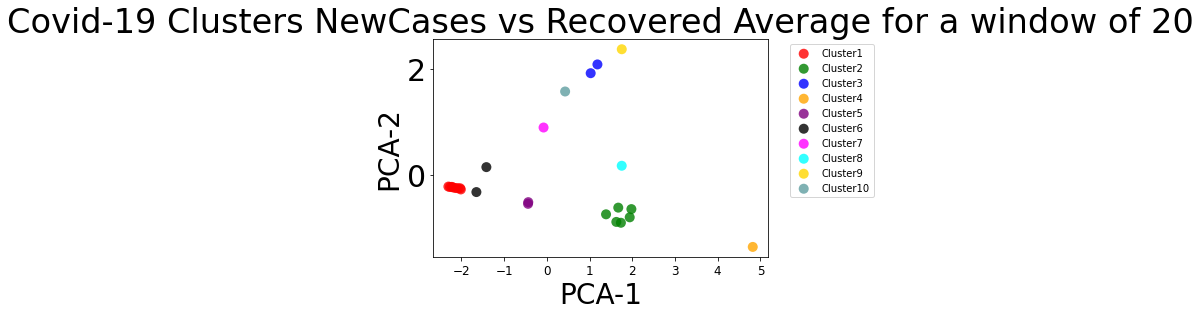

In [50]:
# Visulaize  Clusters 

title = 'Covid-19 Clusters NewCases vs Recovered Average for a window of ' + str(Analysis_window)
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = "cases_detected"
plot_cluster(covid_frame1_daily,title,xlabel,ylabel)

## Labeling Criterion for Covid Data Daily
* Cluster 0 ------> Severity 0 Lowest  
* Cluster 1 ------> Severity 5 Extream 
* Cluster 2 ------> Severity 1 Lower   
* Cluster 3 ------> Severity 4 Highest 
* Cluster 4 ------> Severity 3 High 
* Cluster 5 ------> Severity 2 Medium 

In [51]:
data_covid_daily = pd.DataFrame(np.array(covid_frame1_data_daily),columns=['Total_cases','Recovered','Deaths','cluster'])
_,labeled_clus_covid_daily = auto_labeler(data_covid_daily,[-1,1,-1])

Cluster Mean Values [[0.11497260312755384, 0.10225199425854718, 0.0024200919855267245, 0.0], [3.0682307389826753, 2.674592628052055, 0.07253761279226324, 1.0], [4.072954642352258, 0.025609898447531226, 0.06397779440062581, 2.0], [5.329692011549567, 4.872425409047161, 0.09860442733397498, 3.0], [1.3941421651873969, 1.2896787386413147, 0.039835264688066814, 4.0], [0.7222138535746385, 0.31919066465484836, 0.006704792241562608, 5.0], [2.477273647964351, 0.2997771926271015, 0.05225845655256228, 6.0], [3.609348278252831, 1.9079038594869424, 0.0633002079963023, 7.0], [4.817322251829294, 0.07430740599754684, 0.08998616322559985, 8.0], [3.2713667030020916, 0.010025631205255871, 0.10114309283210088, 9.0]]
3
Final Cumlative Cluster Scores[-0.015140700854533378, -0.46617572372288363, -4.111322538305353, -0.5558710298363809, -0.144298691234149, -0.4097279811613528, -2.2297549118898115, -1.7647446267621911, -4.833001009057347, -3.3624841646289365]
Final Cumlative Cluster Scores sorted [-0.0151407008

<ipython-input-51-e90bff68e0e8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_covid_daily = pd.DataFrame(np.array(covid_frame1_data_daily),columns=['Total_cases','Recovered','Deaths','cluster'])


## Population data based on classification of Age groups
<a class="anchor" id="PopulationdatabasedonclassificationofAgegroups"></a>
### 1. Age 0-16
### 2. Age 17-45
### 3. Age 46-60
### 4. Age 61+

In [52]:
selected_countries = np.array(Population_Data_Age_Wise)
if Debug:
    selected_countries

In [53]:
## Clustering

#clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3,4]])
count = Clust_no_optimizer(selected_countries[:,[1,2,3,4]])
clustering = KMeans(n_clusters=count, random_state=0).fit(selected_countries[:,[1,2,3,4]])
clustering.labels_
clus = list(clustering.labels_)
age_frame = list(zip(countries,clus))
age_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
age_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),selected_countries[:,[4]].tolist(),clus))
if Debug:
    print(age_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(age_frame1)
    print("-------------------------------------------------------------------------------")
    print(age_frame2)

if Verbose:
    pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])

System Generated cluster no = 10 CLuster Limit Capped !


In [54]:
pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])

<ipython-input-54-b3ffe7048f8e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])


,Age 0-16,Age 17-45,Age 46-60,Age 61-100,cluster
0,[17104],[15373],[3019],[1566],5
1,[8538],[19271],[14347],[17758],7
2,[947],[1997],[939],[236],0
3,[389054],[614122],[203095],[134805],1
4,[17945],[26746],[7945],[4902],5
5,[65240],[123131],[62685],[73663],4
6,[47493],[76055],[23698],[12599],8
7,[47528],[93943],[37617],[28638],6
8,[12668],[24331],[13483],[16265],7
9,[5442],[8254],[3869],[3377],9


In [55]:
## Dimensionality Reduction for clusters to plot Graphs in 2D


x = selected_countries[:,[1,2,3,4]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
age_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    print(age_frame1)

# Age groups Classification Clusters Plot
<a class="anchor" id="AgegroupsClassificationClustersPlot"></a>

([[-86790.31876104887], [-86487.54363802384], [-86789.20780146185], [-84945.15236106433], [-86692.41889109445], [-88184.59744064216], [-88109.39326867052], [-84260.26566183753]], [[485.18654995509723], [1077.977062342005], [927.6010010901749], [1719.7682509361784], [805.4086651098613], [882.2546508686331], [751.3362805038665], [1636.880724967593]])
([[670318.4837470956]], [[-104751.4786780972]])
([[31638.06928154113]], [[-34271.64949370908]])
([[656072.4934371647]], [[108177.54248244686]])
([[76996.96414317373]], [[25299.161350511706]])
([[-68109.81906336284], [-56216.516854110436], [-65294.64513219843]], [[-8220.440425139592], [-5618.472205665279], [-557.4781937223732]])
([[26085.84024356945]], [[-712.6733928850017]])
([[-60719.40652620907], [-55613.76165642736]], [[11580.609942262456], [7209.664957273625]])
([[3042.613985775529]], [[-15221.655111669534]])
([[-78069.37618926284], [-79115.003869974], [-76347.7355660413], [-70442.57390000908], [-81060.2840036682], [-80906.44425321305]],

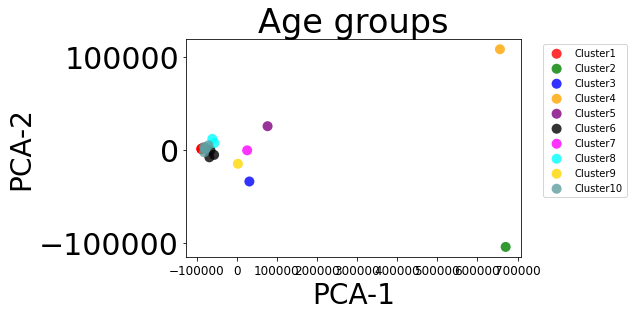

In [56]:
# Visulaize  Clusters 
title = 'Age groups'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = 'Classification based on population Age groups'
plot_cluster(age_frame1,title,xlabel,ylabel)
#plot_cluster_3d(hiv_frame2,title,xlabel,ylabel,zlabel)

# Cluste Labeling :- Age groups
<a class="anchor" id="ClusteLabelingAgegroups"></a>
* Cluster 0 ------> Severity 1 Lower Susceptibility
* Cluster 1 ------> Severity 3 Higher Susceptibility
* Cluster 2 ------> Severity 2 Moderate Susceptibility
* Cluster 3 ------> Severity 4 Critical Susceptibility

In [57]:
data_pop = pd.DataFrame(np.array(age_frame2),columns=['Age_0_16','Age_17_45','Age_46_60','Age_61_100','cluster'])
_,labeled_clus_pop = auto_labeler(data_pop,[1,1,-1,-1])

Cluster Mean Values [[990.75, 1955.75, 1075.0, 1127.375, 0.0], [389054.0, 614122.0, 203095.0, 134805.0, 1.0], [80358.0, 93359.0, 24043.0, 14355.0, 2.0], [271674.0, 566334.0, 337896.0, 241371.0, 3.0], [65240.0, 123131.0, 62685.0, 73663.0, 4.0], [15588.666666666666, 20210.0, 5961.666666666667, 4446.0, 5.0], [47528.0, 93943.0, 37617.0, 28638.0, 6.0], [10603.0, 21801.0, 13915.0, 17011.5, 7.0], [47493.0, 76055.0, 23698.0, 12599.0, 8.0], [5040.333333333333, 8584.666666666666, 4111.5, 4349.833333333333, 9.0]]
4
Final Cumlative Cluster Scores[744.125, 665276.0, 135319.0, 258741.0, 52023.0, 25390.999999999996, 75216.0, 1477.5, 87251.0, 5163.666666666667]
Final Cumlative Cluster Scores sorted [665276.0, 258741.0, 135319.0, 87251.0, 75216.0, 52023.0, 25390.999999999996, 5163.666666666667, 1477.5, 744.125]
Labeled Cluster:- [1, 3, 2, 8, 6, 4, 5, 9, 7, 0]

Cluster Auto Labeling 

Cluster 1 ------> Susceptibility Sever-1 Cluster Magnitude =665276.0 


Cluster 3 ------> Susceptibility Sever-2 Cluster

<ipython-input-57-42385e2c6143>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_pop = pd.DataFrame(np.array(age_frame2),columns=['Age_0_16','Age_17_45','Age_46_60','Age_61_100','cluster'])


# Co-morbidities Dataframe Clustering
<a class="anchor" id="ComorbiditiesDataframeClustering"></a>

## HIV
<a class="anchor" id="HIV"></a>

In [58]:
## Check the List of Countries avaialable
#HIV_Countires_Wise = pd.read_csv('../HIV infected Population/Data_Extract_From_Health_Nutrition_and_Population_Statistics/c600116a-af72-4faa-945a-ab00ddddb96e_Data.csv')

## Columns renaming for Uniformity

#------------------------------------------------------------
HIV_Countires_Wise_complete = HIV_Countires_Wise
# HIV Data 
HIV_Countires_Wise_complete = np.array(HIV_Countires_Wise_complete)
HIV_Countires_Wise_complete[:,[2,3,4]] = np.array(HIV_Countires_Wise_complete[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_hiv = HIV_Countires_Wise_complete[:,[0,1,2,3,4]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_hiv[:,0])):
            if(data_hiv[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    HIV_Countires_Wise_complete = data_hiv[filter2]
    for j in range(0,len(HIV_Countires_Wise_complete[:,0])):
                if(HIV_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(HIV_Countires_Wise_complete[:,2]))/len(HIV_Countires_Wise_complete[:,[2]]))
                    val2 = ((sum(HIV_Countires_Wise_complete[:,3]))/len(HIV_Countires_Wise_complete[:,[3]]))
                    val3 = ((sum(HIV_Countires_Wise_complete[:,4]))/len(HIV_Countires_Wise_complete[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Debug:
    print(selected_countries[:,[0,1,2,3]])

In [59]:
#clustering = KMeans(n_clusters=2, random_state=0).fit(selected_countries[:,[1,2,3]])
count = Clust_no_optimizer(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=count, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
hiv_frame = list(zip(countries,clus))

hiv_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
hiv_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
if Debug:
    print(hiv_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(hiv_frame1)
    print("-------------------------------------------------------------------------------")
    print(hiv_frame2)
if Verbose:
    pd.DataFrame(np.array(hiv_frame2),columns=['val1','val2','val3','cluster'])

System Generated cluster no = 10 CLuster Limit Capped !


In [60]:
## Dimensionality Reduction for clusters to plot Graphs in 2D


x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
hiv_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    hiv_frame1

## HIV Cluster Plot
<a class="anchor" id="HHIVClusterPlot"></a>

([[-628129.27129435], [-633761.9671808167], [-629776.941662745], [-633587.2254224139], [-627609.687145306]], [[-2427.4475721110666], [-2156.0676698588245], [-2246.941507643835], [-2285.833378498266], [-2422.144135175803]])
([[12178219.640476545]], [[-2998.2338503111955]])
([[1438600.184809342]], [[18930.923783691644]])
([[-414583.2801206408], [-405846.1922005001]], [[15.332049950634284], [-6472.953382021453]])
([[-521059.3546236722]], [[-4360.210545436736]])
([[-524661.7766742051]], [[39274.72074921653]])
([[-617221.0982484987], [-613269.2453929057]], [[-2053.0083545799052], [7275.41132690568]])
([[-379789.6326454998]], [[-12784.457582837062]])
([[-592100.1291676811]], [[-2454.343174158052]])
([[-638662.2947240442], [-639736.4113738163], [-639736.4113738163], [-639736.4113738163], [-639736.4113738163], [-639736.4113738163], [-639736.4113738163], [-639736.4113738163], [-638870.4377920734], [-639736.4113738163]], [[-2298.1702229418224], [-2282.823955083289], [-2282.823955083289], [-2282.

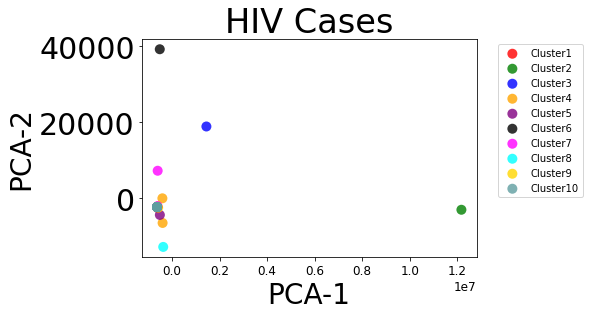

In [61]:
# Visulaize  Clusters 
title = 'HIV Cases'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = '2016 HIV CASE'
plot_cluster(hiv_frame1,title,xlabel,ylabel)
#plot_cluster_3d(hiv_frame2,title,xlabel,ylabel,zlabel)

## Cluste Labeling :- HIV Cases
<a class="anchor" id="ClusteLabelingHIVCases"></a>
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 High Prevelance


In [62]:
data_Hiv = pd.DataFrame(np.array(hiv_frame2),columns=['2017_cases','2018_cases','2019_cases','cluster'])
_,labeled_clus_hiv = auto_labeler(data_Hiv,[-1,-1,-1])

Cluster Mean Values [[5200.0, 5380.0, 5290.0, 0.0], [7300000.0, 7500000.0, 7400000.0, 1.0], [1200000.0, 1200000.0, 1200000.0, 2.0], [130000.0, 135000.0, 132500.0, 3.0], [66000.0, 71000.0, 68500.0, 4.0], [100000.0, 50000.0, 50000.0, 5.0], [18000.0, 12250.0, 12250.0, 6.0], [140000.0, 160000.0, 150000.0, 7.0], [27000.0, 28000.0, 27500.0, 8.0], [110.0, 114.0, 112.0, 9.0]]
3
Final Cumlative Cluster Scores[-15870.0, -22200000.0, -3600000.0, -397500.0, -205500.0, -200000.0, -42500.0, -450000.0, -82500.0, -336.0]
Final Cumlative Cluster Scores sorted [-336.0, -15870.0, -42500.0, -82500.0, -200000.0, -205500.0, -397500.0, -450000.0, -3600000.0, -22200000.0]
Labeled Cluster:- [9, 0, 6, 8, 5, 4, 3, 7, 2, 1]

Cluster Auto Labeling 

Cluster 9 ------> Susceptibility Sever-1 Cluster Magnitude =-336.0 


Cluster 0 ------> Susceptibility Sever-2 Cluster Magnitude =-15870.0 


Cluster 6 ------> Susceptibility Sever-3 Cluster Magnitude =-42500.0 


Cluster 8 ------> Susceptibility Sever-4 Cluster Magnit

<ipython-input-62-a830a760d75a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_Hiv = pd.DataFrame(np.array(hiv_frame2),columns=['2017_cases','2018_cases','2019_cases','cluster'])


## Blood Pressure
<a class="anchor" id="BloodPressure"></a>

In [63]:
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#BP_Male_Data = Blood_Pressure_Countires_Wise[Blood_Pressure_Countires_Wise['Year']==2015]

if Verbose:
    BP_Male_Data

In [64]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]

BP_Female_Data =Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Women') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#------------------------------------------------------------
Blood_Pressure_Countires_Wise_complete = BP_Male_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]

if Debug:
    print(data_bp)
    
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------MALE DATA-------------------------------------------------")
    print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Blood_Pressure_Countires_Wise_complete = BP_Female_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]

if Debug:
    print(data_bp)
    
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------Female DATA-------------------------------------------------")
    print(selected_countries_female[:,[0,1,2,3]])


In [65]:
def cluster_diabetes(selected_countries):    
    
    #clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3]])
    
    count = Clust_no_optimizer(selected_countries[:,[1,2,3]])
    clustering = KMeans(n_clusters=count, random_state=0).fit(selected_countries[:,[1,2,3]])
    
    clustering.labels_
    clus = list(clustering.labels_)
    BP_frame = list(zip(countries,clus))
    
    
    if Debug:
        print(BP_frame)
        print("-------------------------cluster data wise---------------------------------------")
    BP_frame1 = list(zip(selected_countries[:,[0]].tolist() , selected_countries[:,[1]].tolist() ,selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    BP_frame2 = list(zip(selected_countries[:,[1]].tolist() ,selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    if Debug:
        print(BP_frame1)
    return BP_frame2,BP_frame1 , BP_frame,clus
BP_data_male,BP_frame1_male , BP_frame_male , bp_clus_male = cluster_diabetes(selected_countries_male)
BP_data_female,BP_frame1_female , BP_frame_female , bp_clus_female = cluster_diabetes(selected_countries_female)
#BP_data_male Required for Autoclustering
#BP_data_female  Required for Autoclustering

System Generated cluster no = 4
System Generated cluster no = 3


In [66]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

#### MALE#####
x = selected_countries_male[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
BP_frame1_male = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),bp_clus_male))
BP_frame1_male

#### FEMALE#######
x = selected_countries_female[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
BP_frame1_female = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),bp_clus_female))
if Debug:
    BP_frame1_female

## Blood Pressure Cluster Plot
<a class="anchor" id="BloodPressureClusterPlot"></a>

([[-0.002959166045868191], [-0.017765038378210186], [-0.0014037995784052706], [-0.037611495378487604], [-0.02951982441314896], [-0.05462300536588189], [-0.009599067099508744], [-0.02505283812661436]], [[0.001014286258364989], [-0.0240668437262091], [-0.004120236292713798], [-0.005898173515781173], [-0.008549294018848968], [0.004998608844479059], [0.00239448537390344], [0.0042476215072504075]])
([[0.10713986448669649], [0.1991898840624991], [0.1455181899132448], [0.12436145383811564]], [[-0.009413845261767022], [0.0012177022234321514], [-0.0014612974596548158], [0.009410673568299277]])
([[-0.16116899308963908], [-0.12540446575606692], [-0.09342460033124171], [-0.11736683202413212], [-0.15534470404440465]], [[0.0024125678233994285], [0.01932921524801814], [0.0005029732400925844], [0.0025566887657211593], [-0.013459663995844206]])
([[0.006398198760093368], [0.018301742239858896], [0.028085853284008477], [0.0476858075257843], [0.0354689681925544], [0.01604099655528078], [0.0584183757619498

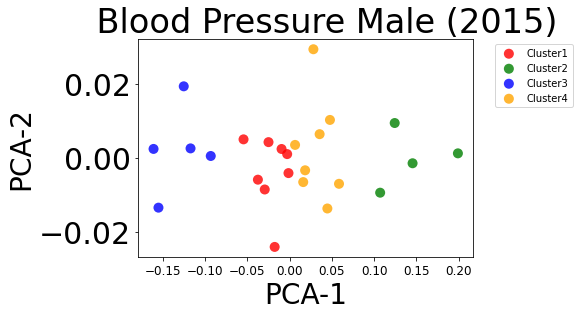

([[-0.1525866997128616], [-0.1269246799626991], [-0.07667287391837545], [-0.10088899944600942], [-0.09484075389371902], [-0.12031594614095505], [-0.14596771063593122], [-0.08446040250555473], [-0.08525504146642211]], [[0.005496634845978445], [0.016940081843925182], [-0.005564952874841456], [-0.0004904108706085316], [-0.003632799817591585], [0.002797899786040741], [-0.005280931765804566], [0.0023695043361212312], [0.0016539649592779743]])
([[0.20703643590023635], [0.09186184141108791], [0.11858742725793374], [0.10242041291990005], [0.10793116849584011], [0.09492909859848754], [0.17848504593998157], [0.18534621177789645]], [[-0.00417985276008259], [0.02795988552182849], [0.013022848828242131], [0.0027353339391557627], [-0.010656329065933591], [-0.01365269004919295], [-0.00196112475039946], [0.009590214749783]])
([[-0.03863641682273808], [0.02130773915587751], [0.013991522145319046], [0.05233061315217314], [-0.04200324519661627], [-0.043356107583341866], [-0.020713040654139824], [-0.04160

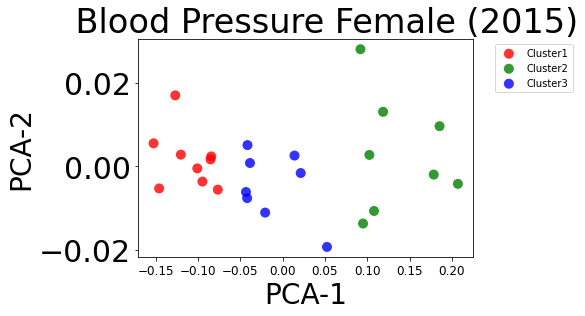

In [67]:
# Visulaize  Clusters 
title1 = '    Blood Pressure Male (2015)'
title2 = '    Blood Pressure Female (2015)'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(BP_frame1_male,title1,xlabel,ylabel)
plot_cluster(BP_frame1_female,title2,xlabel,ylabel)

<a class="anchor" id="ClusteLabelingBloodPressureCases"></a>
## Cluste Labeling :- Blood Pressure Male

* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 0 lowest Prevelance
* Cluster 3 ------> Severity 3 Highest Prevelance

## Cluste Labeling :- Blood Pressure Female
* Cluster 0 ------> Severity 0 Loweest Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 1 Lower Prevelance

In [68]:
data_BP_male = pd.DataFrame(np.array(BP_data_male),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
_,labeled_clus_bp_male = auto_labeler(data_BP_male,[-1,-1,-1])

data_BP_Female = pd.DataFrame(np.array(BP_data_female),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
_,labeled_clus_bp_female =auto_labeler(data_BP_Female,[-1,-1,-1])


Cluster Mean Values [[0.23241069272973625, 0.15518175674071133, 0.3202282730397207, 0.0], [0.32609206525559176, 0.2273959246235862, 0.437282247793909, 1.0], [0.17234568911749437, 0.11515115285281614, 0.2393661630986838, 2.0], [0.26411507041530247, 0.1823776370602522, 0.35529658731626873, 3.0]]
3
Final Cumlative Cluster Scores[-0.7078207225101683, -0.990770237673087, -0.5268630050689943, -0.8017892947918235]
Final Cumlative Cluster Scores sorted [-0.5268630050689943, -0.7078207225101683, -0.8017892947918235, -0.990770237673087]
Labeled Cluster:- [2, 0, 3, 1]

Cluster Auto Labeling 

Cluster 2 ------> Susceptibility Sever-1 Cluster Magnitude =-0.5268630050689943 


Cluster 0 ------> Susceptibility Sever-2 Cluster Magnitude =-0.7078207225101683 


Cluster 3 ------> Susceptibility Sever-3 Cluster Magnitude =-0.8017892947918235 


Cluster 1 ------> Susceptibility Sever-4 Cluster Magnitude =-0.990770237673087 


Cluster Mean Values [[0.12930157049020474, 0.08589221937793635, 0.18256953581579

<ipython-input-68-dbc197c1ba60>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_BP_male = pd.DataFrame(np.array(BP_data_male),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
<ipython-input-68-dbc197c1ba60>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_BP_Female = pd.DataFrame(np.array(BP_data_female),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])


## Diabetes

<a class="anchor" id="Diabetes"></a>

In [69]:
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
if Verbose:
    Diabetes_Male_Data

In [70]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]

Diabetes_Female_Data =Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Women') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
#------------------------------------------------------------
Diabetes_Countires_Wise_complete = Diabetes_Male_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]

if Debug:
    print(data_diabetes)

filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]

if Debug:
    print("-----------------------------------------MALE DATA-------------------------------------------------")
    print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Diabetes_Countires_Wise_complete = Diabetes_Female_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]

if Debug:
    print(data_diabetes)

filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------Female DATA-------------------------------------------------")
    print(selected_countries_female[:,[0,1,2,3]])


In [71]:
def cluster_diabetes(selected_countries):    
    #clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3]])
    
    count = Clust_no_optimizer(selected_countries[:,[1,2,3]])
    clustering = KMeans(n_clusters=count, random_state=0).fit(selected_countries[:,[1,2,3]])
    
    clustering.labels_
    clus = list(clustering.labels_)
    DB_frame = list(zip(countries,clus))
    if Debug:
        print(DB_frame)
        print("-------------------------cluster data wise---------------------------------------")
    DB_frame1 = list(zip(selected_countries[:,[0]].tolist(),selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    DB_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    if Debug:
        print(DB_frame1)
    return DB_frame2,DB_frame1,DB_frame,clus

Diabetes_data_male,Diabetes_frame1_male,Diabetes_frame_male , clus_male = cluster_diabetes(selected_countries_male)
Diabetes_data_female,Diabetes_frame1_female,Diabetes_frame_female,clus_female = cluster_diabetes(selected_countries_female)

System Generated cluster no = 3
System Generated cluster no = 3


In [72]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

#### MALE#####
x = selected_countries_male[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
Diabetes_frame1_male = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus_male))
Diabetes_frame1_male

#### FEMALE#######
x = selected_countries_female[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
Diabetes_frame1_female = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus_female))

if Debug:
    Diabetes_frame1_female

## Diabetes Cluster Plot
<a class="anchor" id="DiabetesPlot"></a>

([[-0.02808958667789408], [-0.007102157465778485], [-0.007773754607127032], [-0.04083279001318557], [-0.02313159106610341], [-0.04273241913780129], [-0.010494781869871366], [-0.05869074683013556], [-0.02363147299230822], [-0.03522478324474337], [-0.04149928858837447], [-0.017344509826661535], [-0.012452608128617077], [-0.03094038725189541], [-0.051801755096410156], [-0.06371959875361195]], [[0.0031042084280986865], [0.005639677475079947], [-0.005394144586828997], [0.011686296520718327], [-0.0038880736093349923], [0.002408435213542499], [2.8764136989668914e-05], [0.0025541547764421513], [0.0020370026843211796], [0.005740554315019279], [0.0015208835006232685], [-0.006706049755820601], [-0.005903952218503545], [-0.006544448423045681], [0.005135858222810512], [0.005434931587627349]])
([[0.20066563620592265]], [[0.012323902883521077]])
([[0.05849098504852987], [0.009962993487595185], [0.02827585829373948], [0.03147909385821151], [0.0328536050318645], [0.029817226045385725], [0.0278522024070

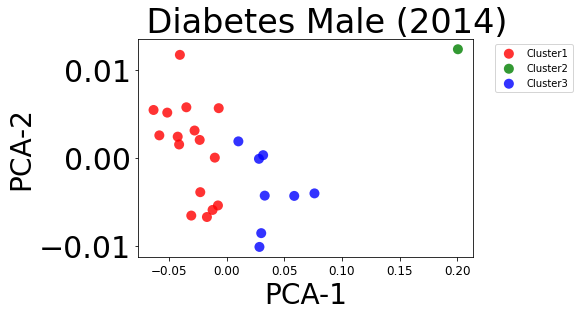

([[-0.05735090411417305], [-0.024974069266634046], [-0.05489568916595115], [-0.07138260910545807], [-0.031745324027766246], [-0.09225441067946029], [-0.0467778949912167], [-0.05171329368574619], [-0.054386529419152715], [-0.07010735472960031], [-0.07883879290642834]], [[0.0023956845020763956], [0.004761580718982901], [0.008318524738625616], [0.0020494919312815892], [0.0019259875221708095], [0.00380344394399812], [0.000530339271664572], [0.005176737330905284], [0.0013792347337460455], [0.0027437656112714428], [0.003942820357959592]])
([[0.08488583595074276], [0.010154594453667237], [0.09752302965919384], [0.03119217992992539], [0.023992705813031406], [0.004697834164022497], [0.06046139345039521], [0.038418512767643465], [0.00026810664412256155], [-0.006528707404264512], [-0.01018371476875878], [0.002866550680956884], [0.08303757212415105]], [[-0.0026498168555169526], [0.00243455061201711], [-0.009058244340264395], [-0.000979719400122158], [-0.006664184053142153], [-0.005487337598230258]

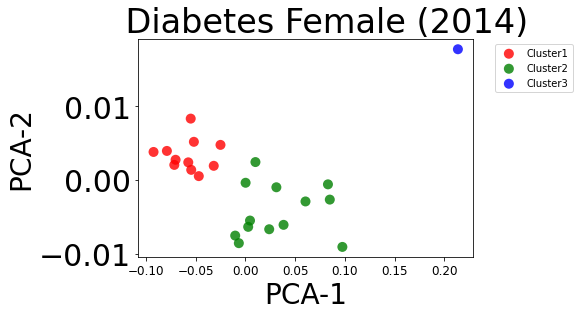

In [73]:
# Visulaize  Clusters 
title1 = '    Diabetes Male (2014)'
title2 = '    Diabetes Female (2014)'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(Diabetes_frame1_male,title1,xlabel,ylabel)
plot_cluster(Diabetes_frame1_female,title2,xlabel,ylabel)

## Cluste Labeling :- Diabetes Male
<a class="anchor" id="ClusteLabelingDiabetesCases"></a>
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 0 Lowest Prevelance

## Cluste Labeling :- Diabetes Female
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 0 Lowest Prevelance


In [74]:
data_diabetes_male = pd.DataFrame(np.array(Diabetes_data_male),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
_,labeled_clus_diabetes_male = auto_labeler(data_diabetes_male,[-1,-1,-1])

data_diabetes_female= pd.DataFrame(np.array(Diabetes_data_female),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
_,labeled_clus_diabetes_female = auto_labeler(data_diabetes_female,[-1,-1,-1])


Cluster Mean Values [[0.06802657358426754, 0.0366961472029043, 0.11111461435011534, 0.0], [0.1965936544864349, 0.128437913333102, 0.280923396162734, 1.0], [0.10381857334967422, 0.05707342612609808, 0.16519817179643387, 2.0]]
3
Final Cumlative Cluster Scores[-0.2158373351372872, -0.6059549639822709, -0.3260901712722062]
Final Cumlative Cluster Scores sorted [-0.2158373351372872, -0.3260901712722062, -0.6059549639822709]
Labeled Cluster:- [0, 2, 1]

Cluster Auto Labeling 

Cluster 0 ------> Susceptibility Sever-1 Cluster Magnitude =-0.2158373351372872 


Cluster 2 ------> Susceptibility Sever-2 Cluster Magnitude =-0.3260901712722062 


Cluster 1 ------> Susceptibility Sever-3 Cluster Magnitude =-0.6059549639822709 


Cluster Mean Values [[0.04642026132387054, 0.025938427843676313, 0.0749202263927985, 0.0], [0.09252619579441644, 0.05039743017622286, 0.1486848012450388, 1.0], [0.196190961273289, 0.128861318022938, 0.2768971654608581, 2.0]]
3
Final Cumlative Cluster Scores[-0.14727891556034

<ipython-input-74-69f66073e7d7>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_diabetes_male = pd.DataFrame(np.array(Diabetes_data_male),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
<ipython-input-74-69f66073e7d7>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_diabetes_female= pd.DataFrame(np.array(Diabetes_data_female),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])


## Tuber Culosis

<a class="anchor" id="TuberCulosis"></a>

In [75]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Tuber_Culosis_Countires_Wise_complete = Tuber_Culosis_Countires_Wise
# TB Data 
Tuber_Culosis_Countires_Wise_complete = np.array(Tuber_Culosis_Countires_Wise_complete)
Tuber_Culosis_Countires_Wise_complete[:,[1,2]] = np.array(Tuber_Culosis_Countires_Wise_complete[:,[1,2]]).astype(int)
selected_countries = np.zeros(shape=(1,3)) 
data_tb = Tuber_Culosis_Countires_Wise_complete[:,[0,1,2]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_tb[:,0])):
            if(data_tb[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Tuber_Culosis_Countires_Wise_complete = data_tb[filter2]
    for j in range(0,len(Tuber_Culosis_Countires_Wise_complete[:,0])):
                if(Tuber_Culosis_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,1]))/len(Tuber_Culosis_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,2]))/len(Tuber_Culosis_Countires_Wise_complete[:,[2]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/3)),3)
                    break;
selected_countries   = selected_countries[1:,[0,1,2]]


if Verbose:
    print(selected_countries[:,[0,1,2]])

In [77]:
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2]])

# count = Clust_no_optimizer(selected_countries[:,[1,2]])
# clustering = KMeans(n_clusters=count, random_state=0).fit(selected_countries[:,[1,2]])

clustering.labels_
clus = list(clustering.labels_)
TB_frame = list(zip(countries,clus))
TB_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),clus))

if Debug:
    print(TB_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(TB_frame1)

In [78]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
TB_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    TB_frame1



## Tuber Culosis Cluster Plot
<a class="anchor" id="TuberCulosisClusterPlot"></a>

([[-77585.76930954643], [-96725.46792990708], [-100044.38573587382], [-81850.5235032369], [-93665.96535621847], [-92782.54058424446], [-96480.7520769813], [-100383.67826565809], [-100342.26849351583], [-99923.80121892843], [-100163.19308677467], [-88393.39350528453], [-99545.74405087251], [-98650.71804674166], [-100217.2196145278], [-100272.09942218057], [-71400.24506353564], [-100099.95023673447], [-99420.78363762493]], [[-2311.398357936193], [-2584.229297822127], [-2313.8913662682007], [213.4984057747955], [-2745.7842469657808], [-2329.056911334104], [-2644.5878210546925], [-2350.079475262794], [-2357.3754173628145], [-2388.2645756452707], [-2390.6169380935294], [-2731.2557666996086], [-2339.2974674853576], [-1825.748587699282], [-2393.800379460826], [-2359.8856818800186], [-2952.9673737205485], [-2355.68354549004], [-2435.1614081564653]])
([[1194996.899858078]], [[-13569.935838731675]])
([[455342.5421019035]], [[23037.20517639977]])
([[8284.230818331296], [-19500.523039804935]], [[1

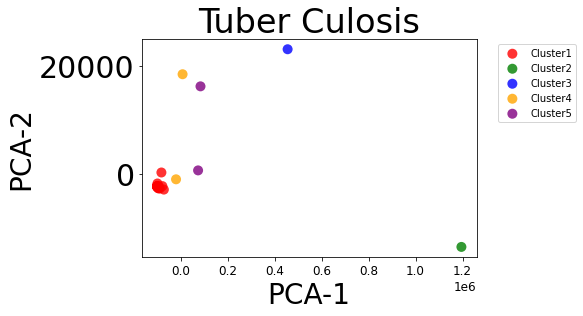

In [79]:
# Visulaize  Clusters 
title = 'Tuber Culosis'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(TB_frame1,title,xlabel,ylabel)

## Medical Expending
<a class="anchor" id="MedicalExpending"></a>

In [80]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Medical_Expending_Countires_Wise_complete = Medical_Expending_Countires_Wise
# Medical Expending
Medical_Expending_Countires_Wise_complete = np.array(Medical_Expending_Countires_Wise_complete)
Medical_Expending_Countires_Wise_complete[:,[1,2,3]] = np.array(Medical_Expending_Countires_Wise_complete[:,[1,2,3]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_ME = Medical_Expending_Countires_Wise_complete[:,[0,1,2,3]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_ME[:,0])):
            if(data_ME[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Medical_Expending_Countires_Wise_complete = data_ME[filter2]
    for j in range(0,len(Medical_Expending_Countires_Wise_complete[:,0])):
                if(Medical_Expending_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Medical_Expending_Countires_Wise_complete[:,1]))/len(Medical_Expending_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Medical_Expending_Countires_Wise_complete[:,2]))/len(Medical_Expending_Countires_Wise_complete[:,[2]]))
                    val3 = ((sum(Medical_Expending_Countires_Wise_complete[:,3]))/len(Medical_Expending_Countires_Wise_complete[:,[3]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries[:,[0,1,2,3]])

In [81]:
if Debug:
    countries

In [82]:
#clustering = KMeans(n_clusters=6, random_state=0).fit(selected_countries[:,[1,2,3]])

count = Clust_no_optimizer(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=count, random_state=0).fit(selected_countries[:,[1,2,3]])

clustering.labels_
clus = list(clustering.labels_)
medical_expend_frame = list(zip(countries,clus))
medical_expend_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
medical_expend_frame1_data = medical_expend_frame1
if Debug:
    print(medical_expend_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(medical_expend_frame1)

System Generated cluster no = 10 CLuster Limit Capped !


In [83]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
medical_expend_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    medical_expend_frame1


## Medical Expending Cluster Plot
<a class="anchor" id="MedicalExpendingClusterPlot"></a>

([[2078.3014929934448], [1588.4956058045263]], [[478.9930542863807], [-116.64176887438869]])
([[-4111.209746809814], [-4207.439432375114], [-4363.067574286322]], [[21.241268699724717], [4.325797823902613], [18.7138390608681]])
([[12249.543772987688], [12169.763302183981]], [[-192.5464856798502], [205.46927033844918]])
([[5033.975033979751]], [[-5.301960203516983]])
([[8362.094763372172]], [[-3.9281894939645507]])
([[3319.8543731406326], [3871.613751484417], [3057.297115741612], [3361.6624619743716]], [[-125.78266719335512], [-136.94331012579468], [12.149100941968037], [-2.7612332518271674]])
([[-1724.6209486143414]], [[-23.28160850990642]])
([[-2737.728573551705], [-3473.6081757011507], [-2772.891053113948], [-2846.1444646699806]], [[-179.46690518381993], [-55.00753259804221], [-105.56612054119064], [64.07654957068604]])
([[-134.36568990801723]], [[13.428044814654182]])
([[-4809.457438873045], [-4809.98625657374], [-4860.283299254287], [-4650.697240708042], [-4743.540692747154], [-4847

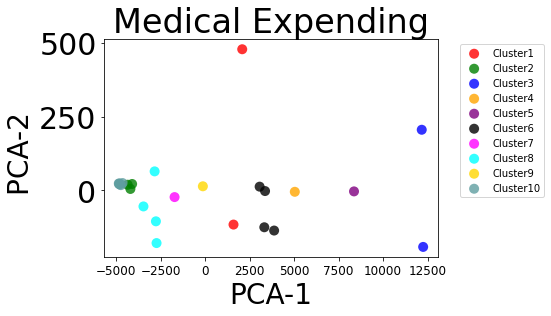

In [84]:
# Visulaize  Clusters 
title = 'Medical Expending'
xlabel = 'PCA-1'
ylabel = 'PCA-2 '
plot_cluster(medical_expend_frame1,title,xlabel,ylabel)

In [85]:
if Verbose:
    list(zip(selected_countries[:,[0]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))

## Cluste Labeling :- Medical Expenditure
<a class="anchor" id="ClusteLabelingMedicalExpending"></a>
* Cluster 0 ------> Severity 0 Highest expending country 
* Cluster 1 ------> Severity 4 Lower  expending country
* Cluster 2 ------> Severity 2 High epending country  
* Cluster 3 ------> Severity 5 Lowest expending country
* Cluster 4 ------> Severity 1 upper medium expending country
* Cluster 5 ------> Severity 3 second Highest expending country 


In [86]:
data_Medical_expenditure = pd.DataFrame(np.array(medical_expend_frame1_data),columns=['2015_expenditure','2016_expenditure','2017_expenditure','cluster'])
_,labeled_clus_pop = auto_labeler(data_Medical_expenditure,[+1,+1,+1])

Cluster Mean Values [[3954.0, 3845.0, 3897.5, 0.0], [389.3333333333333, 384.3333333333333, 422.3333333333333, 1.0], [9672.5, 9888.0, 10101.0, 2.0], [5623.0, 5707.0, 5904.0, 3.0], [7565.0, 7496.0, 7936.0, 4.0], [4666.25, 4747.75, 4993.0, 5.0], [1775.0, 1834.0, 1920.0, 6.0], [1097.25, 1004.0, 1290.5, 7.0], [2708.0, 2736.0, 2840.0, 8.0], [71.83333333333333, 74.33333333333333, 80.83333333333333, 9.0]]
3
Final Cumlative Cluster Scores[11696.5, 1196.0, 29661.5, 17234.0, 22997.0, 14407.0, 5529.0, 3391.75, 8284.0, 227.0]
Final Cumlative Cluster Scores sorted [29661.5, 22997.0, 17234.0, 14407.0, 11696.5, 8284.0, 5529.0, 3391.75, 1196.0, 227.0]
Labeled Cluster:- [2, 4, 3, 5, 0, 8, 6, 7, 1, 9]

Cluster Auto Labeling 

Cluster 2 ------> Susceptibility Sever-1 Cluster Magnitude =29661.5 


Cluster 4 ------> Susceptibility Sever-2 Cluster Magnitude =22997.0 


Cluster 3 ------> Susceptibility Sever-3 Cluster Magnitude =17234.0 


Cluster 5 ------> Susceptibility Sever-4 Cluster Magnitude =14407.0 



<ipython-input-86-88e81990e197>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_Medical_expenditure = pd.DataFrame(np.array(medical_expend_frame1_data),columns=['2015_expenditure','2016_expenditure','2017_expenditure','cluster'])


## Listing all the Clusters of Comorbidites

<a class="anchor" id="ListingalltheClustersofComorbidites"></a>

In [87]:

if Verbose:
    print("Covid-->\n")
    print(covid_frame)
    print("\nHIV-->\n")
    print(hiv_frame)
    print("\nDiabetes Male-->\n")
    print(Diabetes_frame_male)
    print("\nDiabetes Female-->\n")
    print(Diabetes_frame_female)
    print("\nBP Male-->\n")
    print(BP_frame_male)
    print("\nBP Female-->\n")
    print(BP_frame_female)
    print("\nTB-->\n")
    print(TB_frame)
    print("\nMedical-->\n")
    print(medical_expend_frame)
    print("\Age Group-->\n")
    print(age_frame)
    print("\Covid_Daily-->\n")
    print(covid_frame_daily)

# Main Cluster for Prediction

<a class="anchor" id="MainClusterforPrediction"></a>

## Main Mega Frame Formation
<a class="anchor" id="MainMegaFrameFormation"></a>

In [88]:
#final_frame = np.concatenate([covid_frame,hiv_frame,Diabetes_frame_male,Diabetes_frame_female,BP_frame_male,BP_frame_female,TB_frame,medical_expend_frame], axis=1)
# Excluded TB Data for now
final_frame = np.concatenate([covid_frame,hiv_frame,Diabetes_frame_male,Diabetes_frame_female,BP_frame_male,BP_frame_female,medical_expend_frame,age_frame,covid_frame_daily], axis=1)
final_frame = final_frame[:,[0,1,3,5,7,9,11,13,15,17]]

if Debug:
    #TB_frame
    #covid_frame
    age_frame

In [89]:
final_frame

array([['Afghanistan', '0', '0', '2', '1', '1', '1', '9', '5', '0'],
       ['Italy', '3', '3', '0', '0', '3', '2', '8', '7', '1'],
       ['Kuwait', '4', '9', '1', '2', '3', '2', '7', '0', '1'],
       ['India', '6', '9', '2', '1', '3', '1', '9', '1', '5'],
       ['South Africa', '3', '1', '2', '1', '3', '1', '1', '5', '4'],
       ['US', '5', '9', '0', '0', '2', '0', '2', '4', '8'],
       ['Bangladesh', '0', '6', '2', '1', '0', '1', '9', '8', '0'],
       ['Brazil', '4', '9', '0', '1', '3', '2', '7', '6', '1'],
       ['United Kingdom', '2', '5', '0', '0', '2', '0', '0', '7', '9'],
       ['Sri Lanka', '0', '0', '0', '1', '0', '2', '9', '9', '0'],
       ['Chile', '4', '4', '2', '1', '3', '2', '7', '9', '1'],
       ['Norway', '6', '0', '0', '0', '0', '0', '4', '0', '5'],
       ['New Zealand', '0', '0', '0', '0', '2', '0', '0', '0', '0'],
       ['Switzerland', '1', '9', '0', '0', '0', '0', '2', '0', '7'],
       ['Ireland', '3', '0', '0', '0', '0', '2', '5', '0', '6'],
       ['A

## Ensuring Clusters Uniformity
<a class="anchor" id="EnsuringClustersUniformity"></a>

In [90]:
if Verbose:
    print(final_frame)

In [91]:
covid_frame_clus_weight = auto_weight_gen(labeled_clus_covid)#[0/5,5/5,1/5,4/5,3/5,2/5]
hiv_frame_clus_weight = auto_weight_gen(labeled_clus_hiv)#[0,1]
BP_frame__male_clus_weight = auto_weight_gen(labeled_clus_bp_male)#[1/3,2/3,0/3,3/3]
BP_frame__female_clus_weight = auto_weight_gen(labeled_clus_bp_female)#[0/3,2/3,3/3,1/3]
Diabetes_frame_male_clus_weight = auto_weight_gen(labeled_clus_diabetes_male)#[1/3,2/3,3/3,0/3]
Diabetes_frame_female_clus_weight = auto_weight_gen(labeled_clus_diabetes_female)#[1/3,2/3,3/3,0/3]
medical_expend_frame_clus_weight = auto_weight_gen(labeled_clus_pop)#[0/5,4/5,2/5,5/5,1/5,3/5]
age_frame_clus_weight = auto_weight_gen(labeled_clus_pop) #[0/3,2/3,1/3,3/3]
covid_frame_clus_weight_daily = auto_weight_gen(labeled_clus_covid_daily)#[1/3,2/3,0/3,3/3]
## Applying weights for the cluster values
for i in range(len(final_frame[:,0])):
    final_frame[:,1][i] = covid_frame_clus_weight[int(final_frame[:,1][i])]
    final_frame[:,2][i] = hiv_frame_clus_weight[int(final_frame[:,2][i])]
    final_frame[:,3][i] = BP_frame__male_clus_weight[int(final_frame[:,3][i])]
    final_frame[:,4][i] = BP_frame__female_clus_weight[int(final_frame[:,4][i])]
    final_frame[:,5][i] = Diabetes_frame_male_clus_weight[int(final_frame[:,5][i])]
    final_frame[:,6][i] = Diabetes_frame_female_clus_weight[int(final_frame[:,6][i])]
    final_frame[:,7][i] = medical_expend_frame_clus_weight[int(final_frame[:,7][i])]
    final_frame[:,8][i] = age_frame_clus_weight[int(final_frame[:,8][i])]
    final_frame[:,9][i] = covid_frame_clus_weight_daily[int(final_frame[:,9][i])]

[0.0, 0.5, 0.8333333333333334, 0.6666666666666666, 0.3333333333333333, 1.0, 0.16666666666666666]
[0.1111111111111111, 1.0, 0.8888888888888888, 0.6666666666666666, 0.5555555555555556, 0.4444444444444444, 0.2222222222222222, 0.7777777777777778, 0.3333333333333333, 0.0]
[0.3333333333333333, 1.0, 0.0, 0.6666666666666666]
[0.0, 1.0, 0.5]
[0.0, 1.0, 0.5]
[0.0, 0.5, 1.0]
[0.4444444444444444, 0.8888888888888888, 0.0, 0.2222222222222222, 0.1111111111111111, 0.3333333333333333, 0.6666666666666666, 0.7777777777777778, 0.5555555555555556, 1.0]
[0.4444444444444444, 0.8888888888888888, 0.0, 0.2222222222222222, 0.1111111111111111, 0.3333333333333333, 0.6666666666666666, 0.7777777777777778, 0.5555555555555556, 1.0]
[0.0, 0.3333333333333333, 0.8888888888888888, 0.4444444444444444, 0.1111111111111111, 0.2222222222222222, 0.6666666666666666, 0.5555555555555556, 1.0, 0.7777777777777778]


IndexError: list index out of range

In [92]:
if Verbose:
    print(final_frame)

In [93]:
#clustering = KMeans(n_clusters=5, random_state=0).fit(final_frame[:,[1,2,3,4,5,6,7,8,9]])

count = Clust_no_optimizer(final_frame[:,[1,2,3,4,5,6,7,8,9]])
clustering = KMeans(n_clusters=count, random_state=0).fit(final_frame[:,[1,2,3,4,5,6,7,8,9]])


clustering.labels_
clus = list(clustering.labels_)
final_Clus_frame = list(zip(countries,clus))

final_Clus_frame1 = list(zip(final_frame[:,[0]].tolist(),final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),clus))

final_Clus_frame1_data = list(zip(final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),final_frame[:,[3]].tolist(),
                                  final_frame[:,[4]].tolist(),final_frame[:,[5]].tolist(),final_frame[:,[6]].tolist(),
                                  final_frame[:,[7]].tolist(),final_frame[:,[8]].tolist(),final_frame[:,[9]].tolist(),clus))

if Debug:
    print(final_Clus_frame)
    print(final_Clus_frame1)

System Generated cluster no = 5


In [94]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = final_frame[:,[1,2,3,4,5,6,7,8,9]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
final_Clus_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    final_Clus_frame1

## Main Cluster Plot
<a class="anchor" id="MainClusterPlot"></a>

([[1.5108172935618853], [3.6378451797444784], [1.117400582482419], [3.2218084886187315]], [[-4.788690946934542], [-3.369665267224039], [-5.305933014341049], [-1.829636085920762]])
([[-2.6632048552024488], [-2.693235843794099], [-2.770553881803693], [-3.723599895565592], [-5.4470905017586], [-5.134619324580507], [1.0709804952075175]], [[-3.2474882330951504], [-4.540767005678639], [-1.4691097383338976], [-2.361240672919787], [-0.8166352185212705], [-1.5157760397968307], [-1.8434873301442847]])
([[-1.7069290499039191], [-0.2229208715853321], [-3.1140477045193413], [-2.3722494427739242], [-2.4251855627975805]], [[7.2692928259322755], [4.462303324536272], [5.579822062655572], [7.732780296037914], [5.723165081688746]])
([[-5.103102433446209], [-2.5127388558359147], [-7.2025327651587405]], [[-3.0161551143652234], [0.8146311174872647], [-1.1904850170406491]])
([[6.00700460808802], [5.578519855575119], [8.348317756680098], [5.434728860491161], [3.354162447404046], [7.810425420872435]], [[2.6719

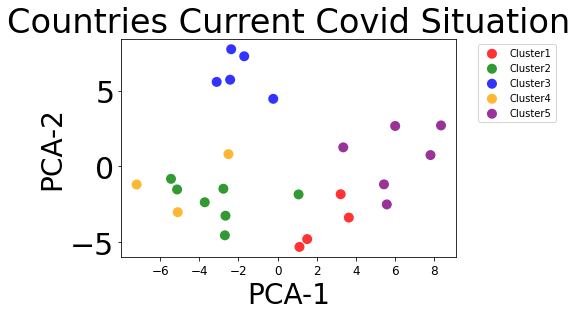

In [95]:
# Visulaize  Clusters 
title = 'Countries Current Covid Situation'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(final_Clus_frame1,title,xlabel,ylabel)

## Master Cluster Ordering
<a class="anchor" id="ClusteLabelingMainCluster"></a>
* Cluster 0 ------> Severity 0
* Cluster 1 ------> Severity 2 
* Cluster 2 ------> Severity 1 
* Cluster 3 ------> Severity 3
* Cluster 4 ------> Severity 4

In [96]:
# Auto Labeling
data_main_clus = pd.DataFrame(np.array(final_Clus_frame1_data),columns=['covid_frame','hiv_frame','Diabetes_frame_male','Diabetes_frame_female',
                                                            'BP_frame_male','BP_frame_female','medical_expend_frame','age_frame','covid_frame_daily','cluster'])
_,labeled_clus_main_frame = auto_labeler(data_main_clus,[-1,-1,-1,-1,-1,-1,1,-1,-1])

Cluster Mean Values [[3.0, 8.0, 0.0, 0.25, 1.75, 0.5, 5.5, 8.25, 1.75, 0.0], [2.0, 8.714285714285714, 1.0, 1.0, 1.2857142857142858, 1.1428571428571428, 5.142857142857143, 0.8571428571428571, 1.7142857142857142, 1.0], [2.4, 0.22222222222222002, 0.4, 0.4, 1.2, 0.7, 2.2, 1.06666666666666, 3.0, 2.0], [2.6666666666666665, 7.666666666666667, 0.0, 0.0, 1.3333333333333333, 0.0, 1.3333333333333333, 3.6666666666666665, 8.0, 3.0], [0.9444444444444334, 2.6111111111111, 1.05555555555555, 0.8333333333333334, 2.0, 1.6666666666666667, 8.166666666666666, 7.833333333333333, 0.5, 4.0]]
9
Final Cumlative Cluster Scores[-18.0, -12.571428571428571, -7.18888888888888, -22.0, -9.27777777777775]
Final Cumlative Cluster Scores sorted [-7.18888888888888, -9.27777777777775, -12.571428571428571, -18.0, -22.0]
Labeled Cluster:- [2, 4, 1, 0, 3]

Cluster Auto Labeling 

Cluster 2 ------> Susceptibility Sever-1 Cluster Magnitude =-7.18888888888888 


Cluster 4 ------> Susceptibility Sever-2 Cluster Magnitude =-9.27777

<ipython-input-96-1805846c1928>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_main_clus = pd.DataFrame(np.array(final_Clus_frame1_data),columns=['covid_frame','hiv_frame','Diabetes_frame_male','Diabetes_frame_female',


# Preparing Data for Deep Net Model
<a class="anchor" id="PreparingDataforDeepNetModel"></a>

In [97]:
## Creating Activation Function (Sigmoid Manually To change activation function make updates here !!)

def activation_function(z):
    return 1/(1+torch.exp(-z))
    

In [98]:

labels = pd.DataFrame(final_Clus_frame)
labels = labels[1]
Country_order = labels[0]
labels = pd.DataFrame(labels)
labels = labels.rename(columns={1: "Target"})

In [99]:
data_label = pd.DataFrame(final_frame[:,[0]])
data = pd.DataFrame(final_frame[:,[1,2,3,4,5,6,7,8,9]])

# ##  adding 
# for i in range(30):
#     data.append(pd.DataFrame(final_frame[:,[1,2,3,4,5,6,7,8,9]]), ignore_index=True)
    
Data_Label_Combined = pd.concat([data, labels], axis=1)
## Storing data into a Dataset Deep_Net_Data only when training is active
if Train_model:
    Data_Label_Combined.to_csv('../DeepNet_Training_Data/Deep_Net_Data.csv', mode='a', header=False)
#data
if Debug:
    Data_Label_Combined

In [100]:
Data_Label_Combined = transformDataframeto_float(Data_Label_Combined)
if Debug:
    Data_Label_Combined

<ipython-input-10-216657a0515e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[k][i] = float(data[k][i])


In [101]:
Data_Label_Combined_np_array = np.array(Data_Label_Combined)

if Debug:
    Data_Label_Combined_np_array

In [102]:
## Converting values to float to convert to tensor
Data_Label_Combined = Data_Label_Combined.astype(float)
Data_Label_Combined['Target'] = Data_Label_Combined['Target'].astype(int)

Data_Label_Combined

,0,1,2,3,4,5,6,7,8,Target
0,0.000000,0.111111,0.000000,1.0,1.0,0.5,1.0,0.333333,0.0,2
1,0.666667,0.666667,0.333333,0.0,3.0,2.0,8.0,7.000000,1.0,4
2,4.000000,9.000000,1.000000,2.0,3.0,2.0,7.0,0.000000,1.0,1
3,6.000000,9.000000,2.000000,1.0,3.0,1.0,9.0,1.000000,5.0,1
4,3.000000,1.000000,2.000000,1.0,3.0,1.0,1.0,5.000000,4.0,2
5,5.000000,9.000000,0.000000,0.0,2.0,0.0,2.0,4.000000,8.0,3
6,0.000000,6.000000,2.000000,1.0,0.0,1.0,9.0,8.000000,0.0,4
7,4.000000,9.000000,0.000000,1.0,3.0,2.0,7.0,6.000000,1.0,0
8,2.000000,5.000000,0.000000,0.0,2.0,0.0,0.0,7.000000,9.0,3
9,0.000000,0.000000,0.000000,1.0,0.0,2.0,9.0,9.000000,0.0,4


In [103]:

torch_tensor_output = torch.tensor(Data_Label_Combined['Target'].values)
torch_tensor_input_data = torch.tensor(Data_Label_Combined[[0,1,2,3,4,5,6,7,8]].values)
torch_tensor_fullData_data = torch.tensor(Data_Label_Combined[[0,1,2,3,4,5,6,7,8,'Target']].values)

#torch_tensor = torch.from_numpy(Data_Label_Combined_np_array)
if Verbose:
    print(torch_tensor_output)
    print(torch_tensor_input_data)

In [104]:
#torch.reshape(torch_tensor_fullData_data[0],(5,2))

In [105]:
class Dataset(object):   

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])



class dataset(Dataset):
    
    def __init__(self, Data_Frame, transform=None):
        self.data = Data_Frame
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        
        out_data = self.data.iloc[index,[0,1,2,3,4,5,6,7,8]]
        label = self.data.iloc[index, 9]
        
        if self.transform is not None:
            out_data = self.transform(out_data)
         
        return torch.tensor(out_data.values).float() , torch.tensor(label).float()

In [106]:
Processed_data = dataset(Data_Label_Combined)

In [107]:
## Loading Data into Data Loader
# create the dataset
dataset = CSVDataset('../DeepNet_Training_Data/Deep_Net_Data.csv')
train_loader = torch.utils.data.DataLoader(Processed_data,batch_size = 1 ,shuffle=False)
# # select rows from the dataset
#train, test = random_split(train_loader, [[...], [...]])
# # create a data loader for train and test sets
# train_dl = DataLoader(train, batch_size=32, shuffle=True)
# test_dl = DataLoader(test, batch_size=1024, shuffle=False)

## Deep Net Model

<a class="anchor" id="DeepNetModel"></a>

In [108]:
## Deep Net Model Schema
if Train_model:
    model = nn.Sequential(nn.Linear(9,64),
                         nn.ReLU(),
                         nn.Linear(64,1))   ## We need to improve this 

    ## Loss definition

    #criterion = nn.CrossEntropyLoss()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.003)

    ## Training

    epochs = 200
    #for e in range(epochs):
    e = 0
    #while (running_loss/len(dat)) > 0.6:
    #for e in range(epochs):
    while(True):
        e += 1
        running_loss = 0
        for dat,lab in train_loader:


            # TODO: Training pass
            optimizer.zero_grad()

            output = model(dat)
            loss = criterion(output, lab)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        else:
            if(e%10==0):
                print(f"Training loss: {running_loss/len(dat)}")
            if(running_loss/len(dat) < 0.6):
                break
                


    ## Saving Model for later reference and predictions      
    torch.save(model, PATH)

    if Verbose:
        ## Prediction 
        with torch.no_grad():
            predictions = model(dat)
        print(predictions)
        print(round(predictions.tolist()[0][0]))

F:\Users\drkkg\anaconda3\envs\deep-learning-2\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Training loss: 12.891032456420362
Training loss: 5.8123831388074905
Training loss: 2.5651186116738245
Training loss: 1.131591761186428


In [109]:
## Loading Model

model = torch.load(PATH)


## Preditions for Country Clusters
final_clus_predictions = []
for dat,lab in train_loader:
    with torch.no_grad():
        predictions = model(dat)
        final_clus_predictions.append(round(predictions.tolist()[0][0]))
final_clus_predictions

[2, 4, 1, 1, 2, 3, 4, 0, 3, 4, 4, 2, 2, 3, 2, 4, 0, 0, 1, 1, 1, 4, 1, 0, 1]

In [110]:
data_label
Deep_Net_Clustering = pd.concat([data_label, pd.DataFrame(final_clus_predictions,columns = ['Clusters'])], axis=1)

Deep_Net_Clustering = Deep_Net_Clustering.rename(columns={0:"Countries"})

Deep_Net_Clustering

,Countries,Clusters
0,Afghanistan,2
1,Italy,4
2,Kuwait,1
3,India,1
4,South Africa,2
5,US,3
6,Bangladesh,4
7,Brazil,0
8,United Kingdom,3
9,Sri Lanka,4


# Vaccine Dosage Prediction
<a class="anchor" id="VaccineDosagePrediction"></a>

## For Now 

### Severity 0 = 10%
### Severity 1 = 20%
### Severity 2 = 30%
### Severity 3 = 40%
### Severity 4 = 70%

# Minimum  Vaccine Dosage Requirment Calcualtion

In [111]:
final_Clus_frame = np.array(final_Clus_frame)

In [112]:
if Verbose:
    print("Labeld Main Frame Clusters " + str(labeled_clus_main_frame))

In [113]:
Master_frame_clus_weight = auto_cluster_label(labeled_clus_main_frame)#[0,2,1,3,4]
# Master_frame_clus_weight = [0,2,1,3,4]



## Applying weights for the cluster values
for i in range(len(final_Clus_frame[:,0])):
    final_Clus_frame[:,1][i] = Master_frame_clus_weight[int(final_Clus_frame[:,1][i])]
    

[3, 2, 0, 4, 1]


In [114]:
final_Clus_frame = pd.DataFrame(final_Clus_frame)
lis1 = list(final_Clus_frame[0])
lis2 = list(final_Clus_frame[1])
final_Clus_frame = list(zip(lis1,lis2))

if Verbose:
    print(pd.DataFrame(final_Clus_frame))

In [115]:
Population_Data_Countires_Wise_Descreet = Population_Data_Countires_Wise_Descreet.fillna(0)

if Verbose:
    print(Population_Data_Countires_Wise_Descreet)

In [116]:
if Debug:
    print(set(Population_Data_Countires_Wise_Descreet['Country']))

In [117]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise_Descreet
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
if Debug:
    Population_Data_Countires_Wise_complete[:,[6,7,8]]

In [118]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise_Descreet
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
Population_Data_Countires_Wise_complete[:,[6,7,8]] = np.array(Population_Data_Countires_Wise_complete[:,[6,7,8]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_pop = Population_Data_Countires_Wise_complete
filter3 = []
for i in countries:
    filter3.clear()
    for j in range(0,len(data_pop[:,0])):
            if(data_pop[j,1] == i):
                filter3.append(True)
            else:
                filter3.append(False)
    Population_Data_Countires_Wise_complete = data_pop[filter3]
    for j in range(0,len(Population_Data_Countires_Wise_complete[:,0])):
                if(Population_Data_Countires_Wise_complete[j,1] == i):
                    val1 = ((sum(Population_Data_Countires_Wise_complete[:,6]))/len(Population_Data_Countires_Wise_complete[:,[6]]))
                    val2 = ((sum(Population_Data_Countires_Wise_complete[:,7]))/len(Population_Data_Countires_Wise_complete[:,[7]]))
                    val3 = ((sum(Population_Data_Countires_Wise_complete[:,8]))/len(Population_Data_Countires_Wise_complete[:,[8]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries)

In [119]:
final_Clus_frame = np.concatenate([final_Clus_frame,selected_countries], axis=1)

In [120]:
if Debug:
    print(selected_countries)

In [121]:
final_Clus_frame = final_Clus_frame[:,[0,1,3,4,5]]
if Debug:
    print(final_Clus_frame)

In [122]:
final_Clus_frame

array([['Afghanistan', '0', '19976', '18952', '38928'],
       ['Italy', '1', '29437', '31024', '60461'],
       ['Kuwait', '2', '2614', '1656', '4270'],
       ['India', '2', '717100', '662903', '1380004'],
       ['South Africa', '0', '29216', '30092', '59308'],
       ['US', '4', '163786', '167216', '331002'],
       ['Bangladesh', '1', '83259', '81430', '164689'],
       ['Brazil', '3', '104435', '108123', '212559'],
       ['United Kingdom', '4', '33542', '34343', '67886'],
       ['Sri Lanka', '1', '10267', '11145', '21413'],
       ['Chile', '1', '9425', '9690', '19116'],
       ['Norway', '0', '2739', '2681', '5421'],
       ['New Zealand', '0', '2370', '2452', '4822'],
       ['Switzerland', '4', '4293', '4360', '8654'],
       ['Ireland', '0', '2451', '2486', '4937'],
       ['Argentina', '1', '22049', '23146', '45195'],
       ['Australia', '3', '12698', '12801', '25499'],
       ['Canada', '3', '18732', '19009', '37742'],
       ['China', '2', '738247', '701076', '1439323']

In [123]:
Array_Deep_Net_Clustering = np.array(Deep_Net_Clustering)

## Adding population data for Deep Net Predictions
Array_Deep_Net_Clustering = np.concatenate((Array_Deep_Net_Clustering, final_Clus_frame[:,[2,3,4]]), axis=1)
Array_Deep_Net_Clustering

array([['Afghanistan', 2, '19976', '18952', '38928'],
       ['Italy', 4, '29437', '31024', '60461'],
       ['Kuwait', 1, '2614', '1656', '4270'],
       ['India', 1, '717100', '662903', '1380004'],
       ['South Africa', 2, '29216', '30092', '59308'],
       ['US', 3, '163786', '167216', '331002'],
       ['Bangladesh', 4, '83259', '81430', '164689'],
       ['Brazil', 0, '104435', '108123', '212559'],
       ['United Kingdom', 3, '33542', '34343', '67886'],
       ['Sri Lanka', 4, '10267', '11145', '21413'],
       ['Chile', 4, '9425', '9690', '19116'],
       ['Norway', 2, '2739', '2681', '5421'],
       ['New Zealand', 2, '2370', '2452', '4822'],
       ['Switzerland', 3, '4293', '4360', '8654'],
       ['Ireland', 2, '2451', '2486', '4937'],
       ['Argentina', 4, '22049', '23146', '45195'],
       ['Australia', 0, '12698', '12801', '25499'],
       ['Canada', 0, '18732', '19009', '37742'],
       ['China', 1, '738247', '701076', '1439323'],
       ['Slovenia', 1, '1035', '1043

In [124]:
def Vacc_Percentage_Calc(final_Clus_frame):
    
    M_Vaccine_dosage = []
    F_Vaccine_dosage = []
    T_Vaccine_dosage = []
    Percent_Pop_Vac = []
    Country_Category = []
    Country_Category_int = []


    for i in final_Clus_frame:
        if int(i[1]) == 0:
            M_Vaccine_dosage.append(int(i[2])*0.1)
            F_Vaccine_dosage.append(int(i[3])*0.1)
            T_Vaccine_dosage.append(int(i[4])*0.1)
            Percent_Pop_Vac.append(int(10))
            Country_Category.append("Low Impact")
            Country_Category_int.append(0)

        elif int(i[1]) == 1:
            M_Vaccine_dosage.append(int(i[2])*0.2)
            F_Vaccine_dosage.append(int(i[3])*0.2)
            T_Vaccine_dosage.append(int(i[4])*0.2)
            Percent_Pop_Vac.append(int(20))
            Country_Category.append("Moderate Impact")
            Country_Category_int.append(1)


        elif int(i[1]) == 2:
            M_Vaccine_dosage.append(int(i[2])*0.3)
            F_Vaccine_dosage.append(int(i[3])*0.3)
            T_Vaccine_dosage.append(int(i[4])*0.3)
            Percent_Pop_Vac.append(int(30))
            Country_Category.append("High Impact")
            Country_Category_int.append(2)

        elif int(i[1]) == 3:
            M_Vaccine_dosage.append(int(i[2])*0.4)
            F_Vaccine_dosage.append(int(i[3])*0.4)
            T_Vaccine_dosage.append(int(i[4])*0.4)
            Percent_Pop_Vac.append(int(40))
            Country_Category.append("Severe Impact")
            Country_Category_int.append(3)


        elif int(i[1]) == 4:
            M_Vaccine_dosage.append(int(i[2])*0.7)
            F_Vaccine_dosage.append(int(i[3])*0.7)
            T_Vaccine_dosage.append(int(i[4])*0.7)
            Percent_Pop_Vac.append(int(70))
            Country_Category.append("Critical Impact")
            Country_Category_int.append(4)
            
    ## All clusters vaules greater than 4 will be put in critical Impact by default If criterion changes make updates here   
        else:
            M_Vaccine_dosage.append(int(i[2])*0.7)
            F_Vaccine_dosage.append(int(i[3])*0.7)
            T_Vaccine_dosage.append(int(i[4])*0.7)
            Percent_Pop_Vac.append(int(70))
            Country_Category.append("Critical Impact")
            Country_Category_int.append(4)
            
            
    return final_Clus_frame,M_Vaccine_dosage,F_Vaccine_dosage,T_Vaccine_dosage,Percent_Pop_Vac,Country_Category,Country_Category_int






        

In [125]:
def Final_Frame_Calculation(final_Clus_frame,M_Vaccine_dosage,F_Vaccine_dosage,T_Vaccine_dosage,Percent_Pop_Vac,Country_Category,Country_Category_int):
    
    final_Clus_dataframe = pd.DataFrame(final_Clus_frame , 
    columns=['Country','Cluster','Male_Populstion','Female_Population','Total_Population'])

    final_Clus_dataframe['Min_Covid_Vaccine_for_Male'] = M_Vaccine_dosage
    final_Clus_dataframe['Min_Covid_Vaccine_for_Female'] = F_Vaccine_dosage
    final_Clus_dataframe['Min_Covid_Vaccine_for_total'] = T_Vaccine_dosage
    final_Clus_dataframe['Percent_Pop_Vac'] = Percent_Pop_Vac
    final_Clus_dataframe['Vulnerability'] = Country_Category
    final_Clus_dataframe['Vulnerability_int'] = Country_Category_int

    if Debug:

        print(M_Vaccine_dosage)

        print(F_Vaccine_dosage) 

        print(T_Vaccine_dosage)

        print(Percent_Pop_Vac)

        print(Country_Category)
    

    if Verbose:
        final_Clus_dataframe
    
    return final_Clus_dataframe








In [126]:
## Calculating the Frames for covid
val1,val2,val3,val4,val5,val6,val7 = Vacc_Percentage_Calc(final_Clus_frame)
final_Clus_dataframe_Clustering_Algo = Final_Frame_Calculation(val1,val2,val3,val4,val5,val6,val7)


val1,val2,val3,val4,val5,val6,val7 = Vacc_Percentage_Calc(Array_Deep_Net_Clustering)
final_Clus_dataframe_Deep_net = Final_Frame_Calculation(val1,val2,val3,val4,val5,val6,val7)


In [127]:
if Verbose:
    print("--------------------Clustering Predictions-------------")
    print(final_Clus_dataframe_Clustering_Algo)
    print("--------------------Deep Net Predictions-------------")
    print(final_Clus_dataframe_Deep_net)

##  Writing the cleaned data in Cleaned Folder

In [128]:
final_Clus_dataframe_Clustering_Algo.to_csv('../final_Cluster_frame.csv')
final_Clus_dataframe_Deep_net.to_csv('../final_Cluster_frame_Deep_net.csv')

## Minimum Covid Vaccine Required Plot
<a class="anchor" id="MinimumCovidVaccineRequiredPlot"></a>

In [129]:
def Visualize1(final_Clus_dataframe,algotype):    
    ## Visualisation # 1
    ylab = "Vaccine_Dosage in One Thousand"
    xlab ="Country" + "Date:- " + Latest_date


    df = final_Clus_dataframe


    labels = df['Country']
    prev_vaccMale = df['Min_Covid_Vaccine_for_Male']
    prev_vaccFemale = df['Min_Covid_Vaccine_for_Female']
    prev_vaccTotal = df['Min_Covid_Vaccine_for_total']

    title1 = 'Minimum Covid Vaccine Required ' + str(algotype)

    #high = int(max(prev_2018))
    #low = 0  

    x = np.arange(len(labels))  # the x label locations 
    width = .50  # the width of the bars
    fig, ax = plt.subplots(figsize=(15,15))
    rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='prev_vaccMale')
    rects2 = ax.bar(x, prev_vaccFemale, width, label='prev_vaccFemale')
    rects3 = ax.bar(x+width/2, prev_vaccTotal, width, label='prev_vaccTotal')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title1)
    ax.set_xticks(x)
    #ax.set_yticks(y)
    plt.xticks(rotation=90) 
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
    ax.set_xticklabels(labels)
    ax.legend()



    plt.show()

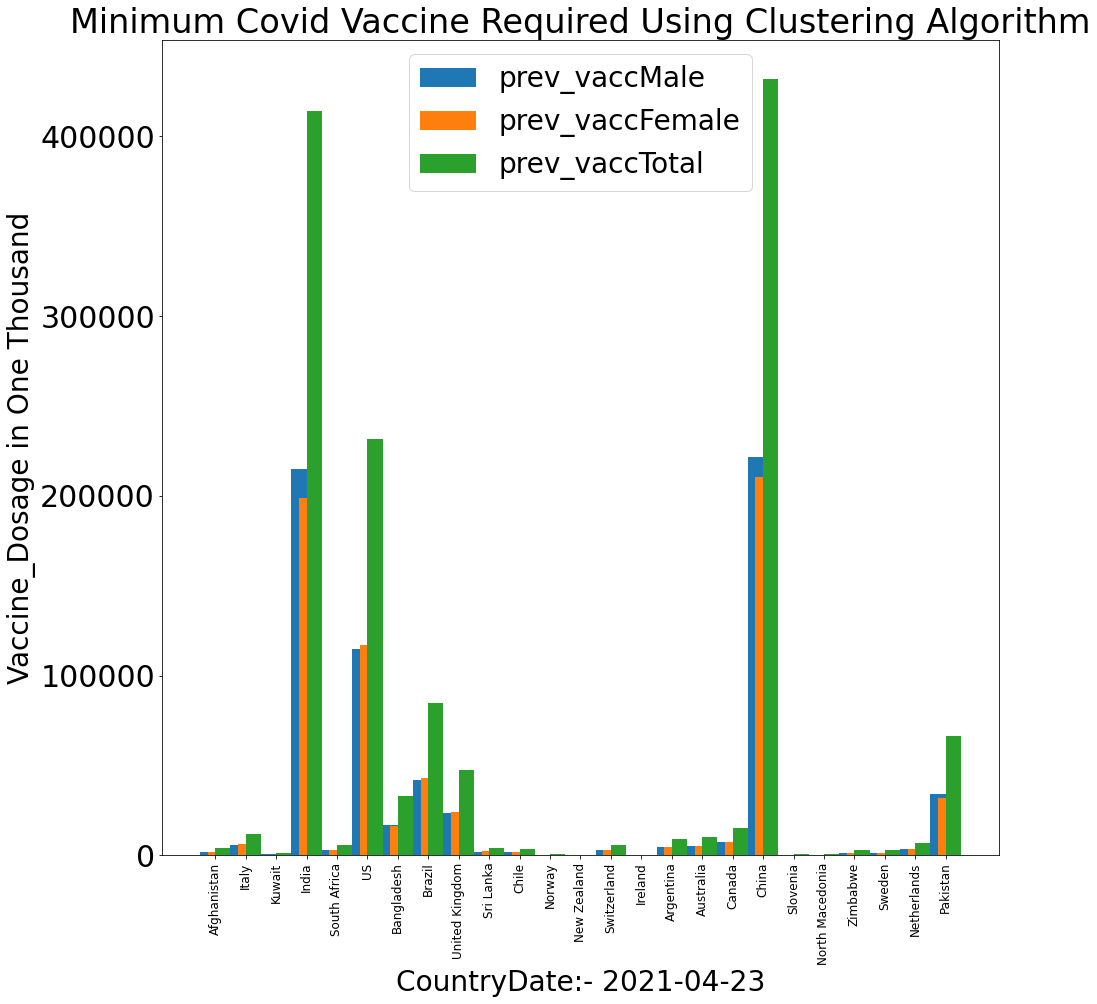

In [130]:
Visualize1(final_Clus_dataframe_Clustering_Algo,"Using Clustering Algorithm")

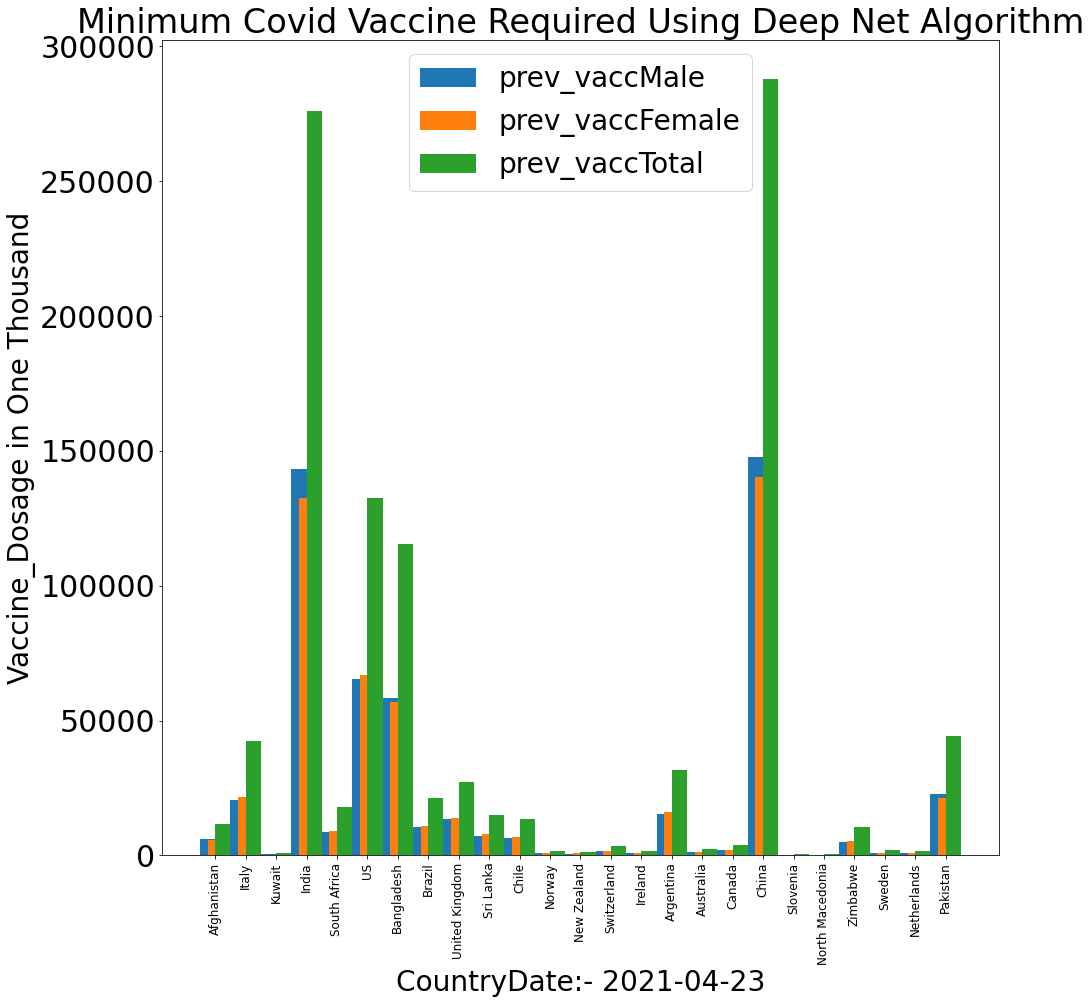

In [131]:
Visualize1(final_Clus_dataframe_Deep_net,"Using Deep Net Algorithm")

## Minimum Percentage Vaccine Required Plot
<a class="anchor" id="MinimumPercentageVaccineRequiredPlot"></a>

In [132]:
def Visualize2(final_Clus_dataframe, algotype):    
    ## Visualisation # 2
    ylab = "Percentage of Population Require Vaccine "
    xlab = "Country" + "Date:- " + Latest_date


    df = final_Clus_dataframe


    labels = df['Country']
    prev_vaccMale = df['Percent_Pop_Vac']

    title1 = 'Minimum Percentage of Vacine Required ' + str(algotype)

    #high = int(max(prev_2018))
    #low = 0  

    x = np.arange(len(labels))  # the x label locations 
    width = .50  # the width of the bars
    fig, ax = plt.subplots(figsize=(15,15))
    rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Percent_Pop_Vac')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title1)
    ax.set_xticks(x)
    #ax.set_yticks(y)
    plt.xticks(rotation=90) 
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
    ax.set_xticklabels(labels)
    ax.legend()



    plt.show()

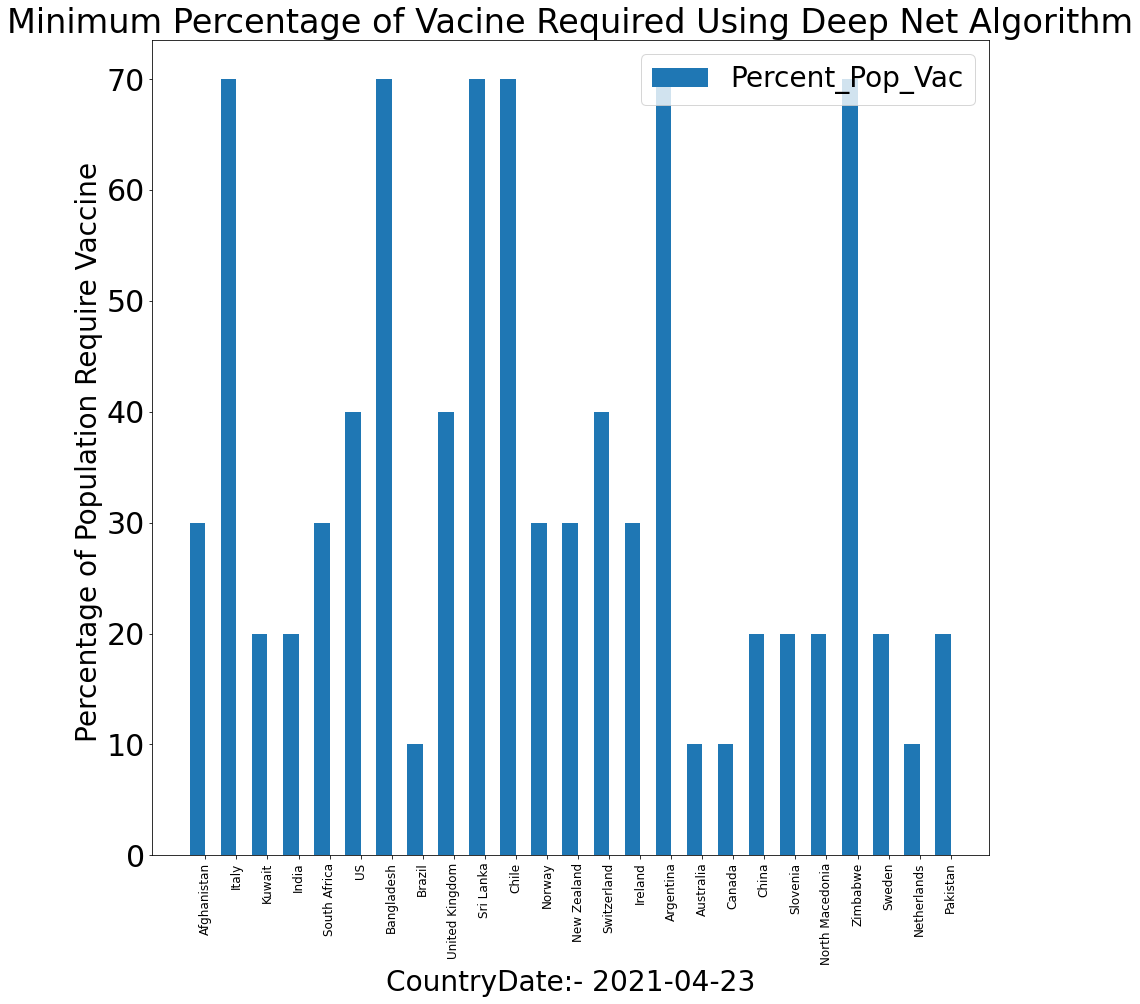

In [133]:
Visualize2(final_Clus_dataframe_Deep_net,"Using Deep Net Algorithm")

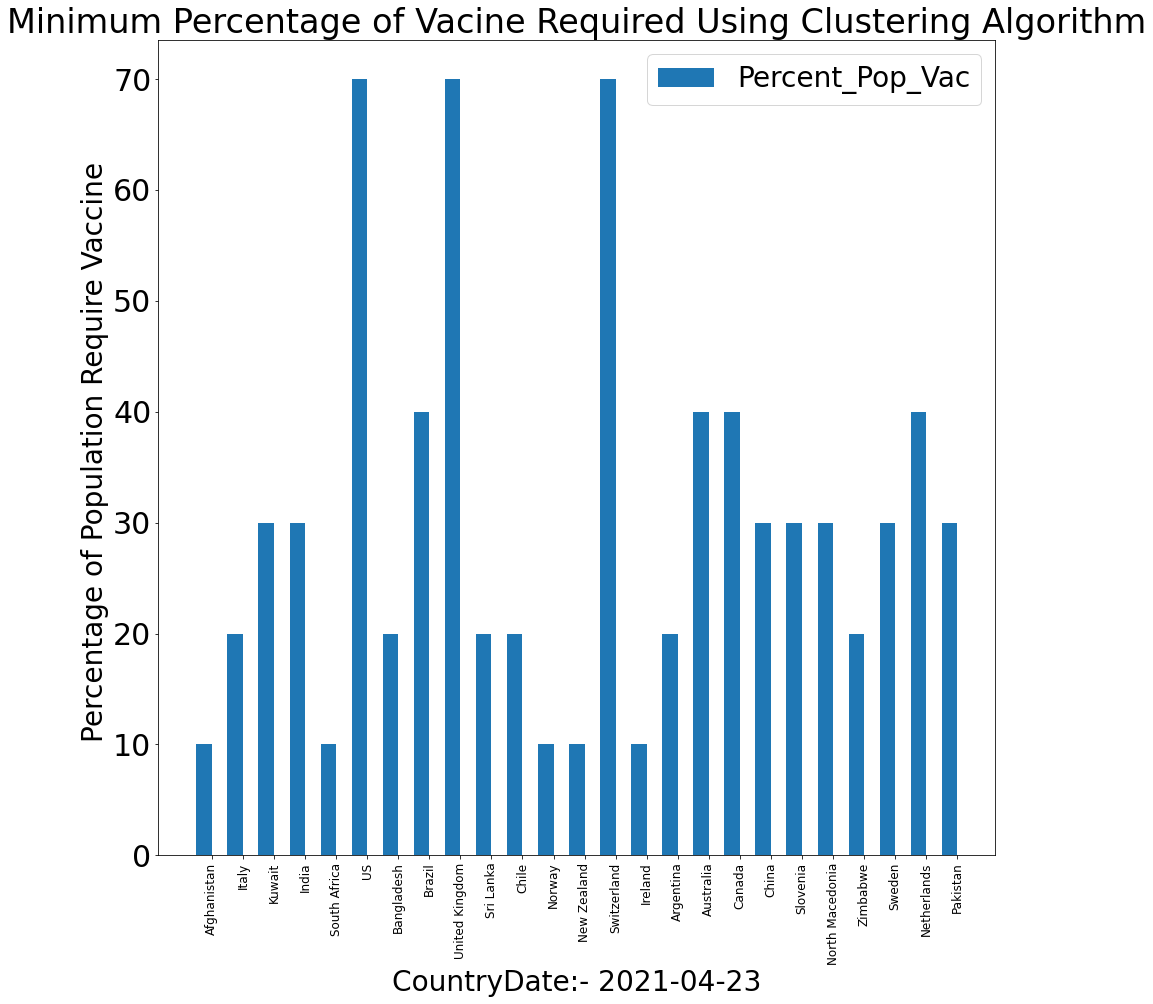

In [134]:
Visualize2(final_Clus_dataframe_Clustering_Algo,"Using Clustering Algorithm")

## Countries Covid Vulnerability Status Plot
<a class="anchor" id="CountriesCovidVulnerabilityStatusPlot"></a>

In [135]:
def Visualize3(final_Clus_dataframe, algotype):    
    ## Visualisation # 3
    ylab = "Countries Covid Vulnerability Status "
    xlab = "Country" + "Date:- " + Latest_date


    df = final_Clus_dataframe


    labels = df['Country']
    prev_vaccMale = df['Vulnerability_int']

    title1 = 'Countires Covid Vulnerability Status ' + algotype

    #high = int(max(prev_2018))
    #low = 0  

    x = np.arange(len(labels))  # the x label locations 
    width = .50  # the width of the bars
    fig, ax = plt.subplots(figsize=(15,15))
    #rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Vulnerability')
    rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Vulnerability \n0 - Low Impact \n 1 - Moderate Impact \
                    \n 2 - High Impact \n 3 - Severe Impact \n 4 - Critical Impact')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title1)
    ax.set_xticks(x)
    #ax.set_yticks(y)
    plt.xticks(rotation=90) 
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
    ax.set_xticklabels(labels)
    ax.legend()



    plt.show()

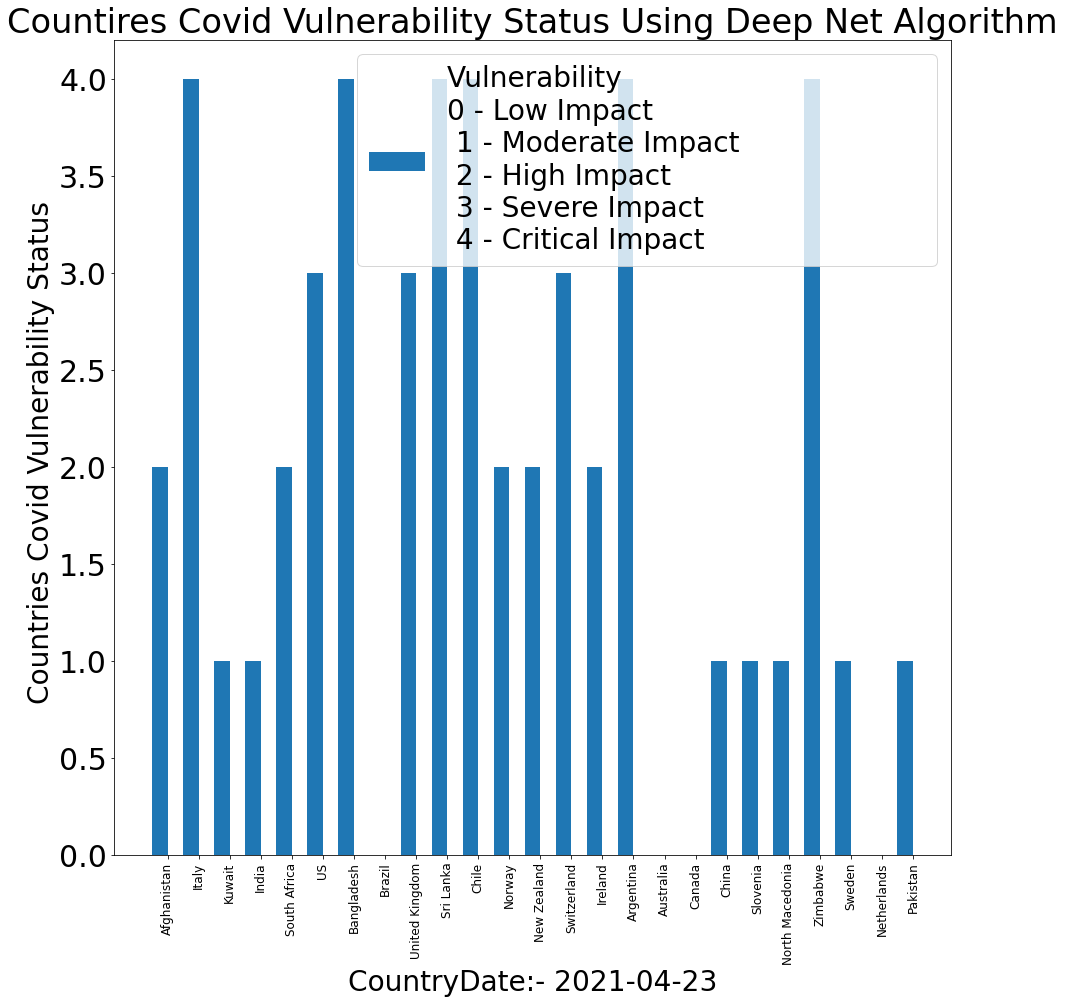

In [136]:
Visualize3(final_Clus_dataframe_Deep_net,"Using Deep Net Algorithm")

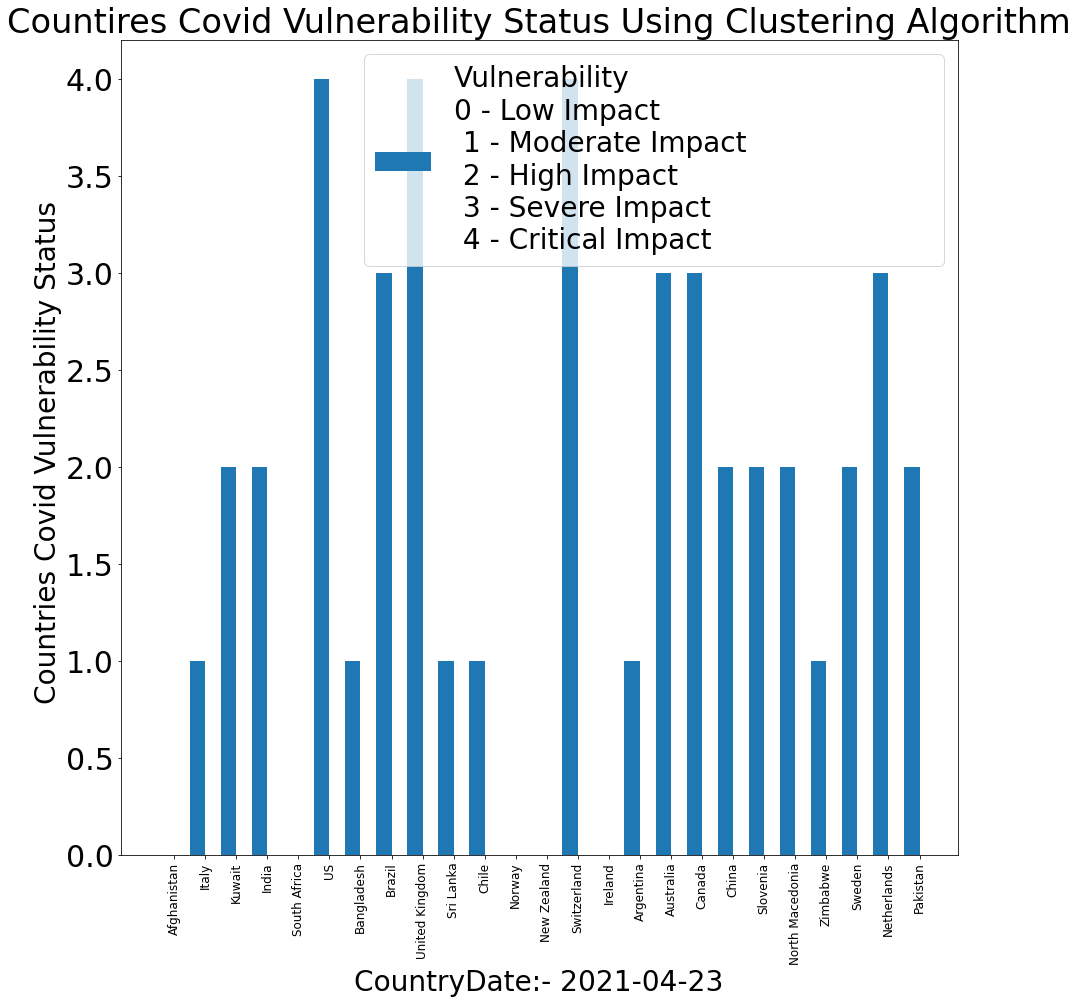

In [137]:
Visualize3(final_Clus_dataframe_Clustering_Algo,"Using Clustering Algorithm")

## Points to Discuss
<a class="anchor" id="discuss"></a>

* Should we Take Present Data or Average for covid values
* Clusters Labeling Automation